In [61]:
import numpy as np                      # 数学関数用のNumPyライブラリをインポートする
import matplotlib.pyplot as plt         # プロット用のmatplotlibライブラリをインポートする
from scipy.sparse import spdiags        # 疎行列関数のインポート
from scipy.sparse.linalg import eigsh   # 疎対称行列の固有値サブルーチン
import math
import time

# FD-1

In [62]:
deltaxi = 0.01                  # 差分を定義する

xi_max = 10.0                          # xiの最大値
xi = np.arange(-xi_max,xi_max,deltaxi) # 間隔 deltax = 0.1 の -10 から 10 までの点の配列
length_xi = xi.size                    # xi配列の長さ

# 運動エネルギー行列の構築
T_xi = -0.5*spdiags([np.ones(length_xi), -2*np.ones(length_xi), np.ones(length_xi)], [-1, 0, 1], length_xi, length_xi)/deltaxi**2

# 位置エネルギー行列
V_xi = 0.5*spdiags(xi**2, 0, length_xi, length_xi)

# 調和振動子のハミルトニアン行列形式
H_xi = T_xi + V_xi

# マトリックスの左上隅をプリントして確認する
print(H_xi.toarray()[0:5,0:5])

[[10050.      -5000.          0.          0.          0.     ]
 [-5000.      10049.90005 -5000.          0.          0.     ]
 [    0.      -5000.      10049.8002  -5000.          0.     ]
 [    0.          0.      -5000.      10049.70045 -5000.     ]
 [    0.          0.          0.      -5000.      10049.6008 ]]


In [63]:
N_eigenvalues = 11   # 計算する固有値の数

E0 = 0              # この値に最も近い固有値を見つる。E0 = 0はポテンシャルの底なので、
                    # この値により基底状態と最初のいくつかの励起状態を見つけることができる。

eigenvalues, eigenvectors = eigsh(H_xi, k=N_eigenvalues, sigma=E0)  # eigsh関数を呼び出す

#　得られた固有値を出力し、解析結果と比較する

eigenvalues_exact = np.arange(0,N_eigenvalues)+0.5 #　調和振動子の正確な固有値はE_n = n + 1/2である。

print('En(exact) = ',eigenvalues_exact)
print('En(calculated) =',eigenvalues)
print('Rel. error =',np.abs(eigenvalues-eigenvalues_exact)/eigenvalues_exact)

En(exact) =  [ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5]
En(calculated) = [ 0.49999687  1.49998437  2.49995937  3.49992187  4.49987187  5.49980937
  6.49973436  7.49964686  8.49954685  9.49943434 10.49930933]
Rel. error = [6.25003914e-06 1.04167839e-05 1.62502735e-05 2.23219364e-05
 2.84730426e-05 3.46603020e-05 4.08670645e-05 4.70855602e-05
 5.33116755e-05 5.95430289e-05 6.57781462e-05]


In [64]:
eigenvectors_normalized = eigenvectors/np.sqrt(deltaxi)

#正規化を確認する

for n in range(N_eigenvalues):
    print('Normalization n=',n,deltaxi*np.sum(eigenvectors_normalized[:,n]**2))

Normalization n= 0 0.9999999999999998
Normalization n= 1 1.0000000000000002
Normalization n= 2 0.9999999999999999
Normalization n= 3 0.9999999999999974
Normalization n= 4 1.0000000000000007
Normalization n= 5 1.0000000000000002
Normalization n= 6 0.9999999999999989
Normalization n= 7 1.0
Normalization n= 8 0.9999999999999989
Normalization n= 9 1.0
Normalization n= 10 1.0000000000000004


Text(0.5, 1.0, 'eigenfunctions')

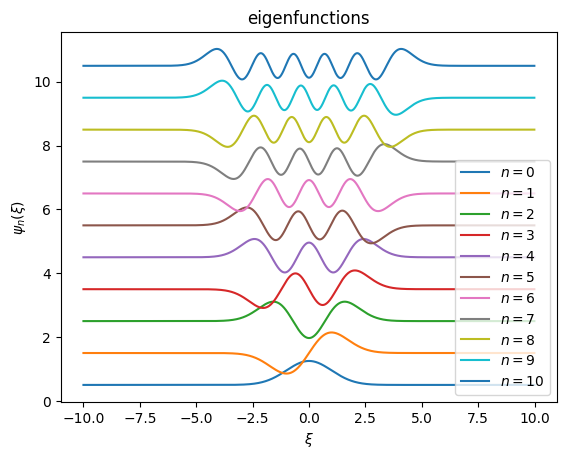

In [65]:
plot_n=[0,1,2,3,4,5,6,7,8,9,10]   # プロットが乱雑にならないように、固有ベクトルのサブセットを選択する。
plotcolors_exact=['r','b','m','g','k'] # プロット用の色のセットを定義する。
                                       # その他の色については、https://matplotlib.org/stable/gallery/color/named_colors.html を参照.

#plotcolors_calc=['salmon','deepskyblue','violet','lime','slategray']

# 選択した固有ベクトルをループし、1つずつプロットする。
for n in plot_n:
    #eigenfunction_exact = HO_eigenfunction(n,xi) # 正確なHO固有関数
    #sign = np.sign(np.dot(eigenvectors_normalized[:,n],eigenfunction_exact)) # 重なりの符号を計算する
                                                                             # この符号は、正確な波動関数と計算された波動関数
                                                                             # が同じ符号を持つことを保証するために必要
    #plt.plot(xi, eigenfunction_exact, '-', color = plotcolors_exact[n], label='$n=$' + str(n) + ' (exact)')
    plt.plot(xi, n+0.5+eigenvectors_normalized[:,n] , label='$n=$' + str(n))

# 軸ラベルと凡例を追加する
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\psi_n(\xi)$')
plt.legend(loc='lower right')
plt.title('eigenfunctions')

#FD-2

In [66]:
deltaxi = 0.01                  # 差分を定義する

xi_max = 10.0                          # xiの最大値
g = 0.10
xi = np.arange(-xi_max,xi_max,deltaxi) # 間隔 deltax = 0.1 の -10 から 10 までの点の配列
length_xi = xi.size                    # xi配列の長さ

# 運動エネルギー行列の構築
T_xi = -0.5*spdiags([np.ones(length_xi), -2*np.ones(length_xi), np.ones(length_xi)], [-1, 0, 1], length_xi, length_xi)/deltaxi**2

# 位置エネルギー行列
V_xi = 0.5*spdiags(xi**2+ 2 * g * xi**4, 0, length_xi, length_xi)

# 調和振動子のハミルトニアン行列形式
H_xi = T_xi + V_xi

# マトリックスの左上隅をプリントして確認する
print(H_xi.toarray()[0:5,0:5])

[[11050.         -5000.             0.             0.
      0.        ]
 [-5000.         11045.906046   -5000.             0.
      0.        ]
 [    0.         -5000.         11041.82416802 -5000.
      0.        ]
 [    0.             0.         -5000.         11037.75434208
  -5000.        ]
 [    0.             0.             0.         -5000.
  11033.69654426]]


In [59]:
N_eigenvalues = 4   # 計算する固有値の数

E0 = 0              # この値に最も近い固有値を見つる。E0 = 0はポテンシャルの底なので、
                    # この値により基底状態と最初のいくつかの励起状態を見つけることができる。

eigenvalues, eigenvectors = eigsh(H_xi, k=N_eigenvalues, sigma=E0)  # eigsh関数を呼び出す

#　得られた固有値を出力し、解析結果と比較する
eigenvalues_exact = np.zeros(11)
for i in range(N_eigenvalues):
  eigenvalues_exact[i] = i + 0.5 + 0.75 * g * (2*i**2 + 2*i +1)
#eigenvalues_exact = np.arange(0,N_eigenvalues)+0.5 + 0.75 * g * (2*n**2 + 2*n +1)#　調和振動子の正確な固有値はE_n = n + 1/2である。

print('En(exact) = ',eigenvalues_exact)
print('En(calculated) =',eigenvalues)
print('Rel. error =',np.abs(eigenvalues-eigenvalues_exact)/eigenvalues_exact)

eigenvectors_normalized = eigenvectors/np.sqrt(deltaxi)

#正規化を確認する

for n in range(N_eigenvalues):
    print('Normalization n=',n,deltaxi*np.sum(eigenvectors_normalized[:,n]**2))


En(exact) =  [ 0.575  1.875  3.475  5.375  7.575 10.075 12.875 15.975 19.375 23.075
 27.075]
En(calculated) = [ 0.55914189  1.7694763   3.13854498  4.62871018  6.21998661  7.89925566
  9.65706878 11.48621602 13.38097218 15.33665585 17.34935186]
Rel. error = [0.02757932 0.05627931 0.09682159 0.13884462 0.17887966 0.21595477
 0.24993641 0.28098804 0.30936918 0.33535619 0.35921138]
Normalization n= 0 0.9999999999999998
Normalization n= 1 1.0000000000000002
Normalization n= 2 0.999999999999998
Normalization n= 3 0.9999999999999998
Normalization n= 4 1.0000000000000004
Normalization n= 5 1.0000000000000013
Normalization n= 6 1.0000000000000002
Normalization n= 7 0.9999999999999998
Normalization n= 8 0.9999999999999989
Normalization n= 9 0.9999999999999993
Normalization n= 10 0.9999999999999998


Text(0.5, 1.0, 'eigenfunctions')

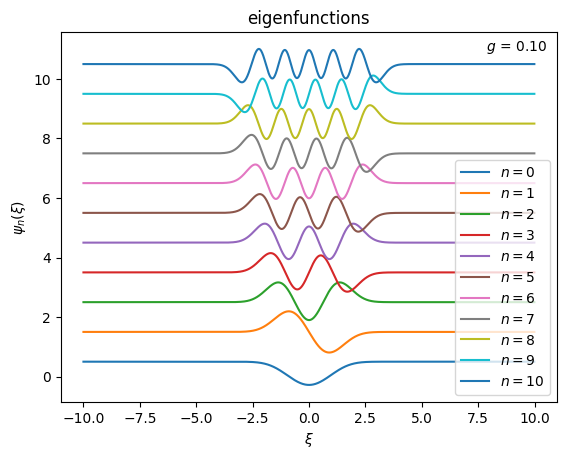

In [60]:
plot_n=[0,1,2,3,4,5,6,7,8,9,10  ] # プロットが乱雑にならないように、固有ベクトルのサブセットを選択する。
plotcolors_exact=['r','b','m','g','k'] # プロット用の色のセットを定義する。
                                       # その他の色については、https://matplotlib.org/stable/gallery/color/named_colors.html を参照.

#plotcolors_calc=['salmon','deepskyblue','violet','lime','slategray']

# 選択した固有ベクトルをループし、1つずつプロットする。
for n in plot_n:
    #eigenfunction_exact = HO_eigenfunction(n,xi) # 正確なHO固有関数
    #sign = np.sign(np.dot(eigenvectors_normalized[:,n],eigenfunction_exact)) # 重なりの符号を計算する
                                                                             # この符号は、正確な波動関数と計算された波動関数
                                                                             # が同じ符号を持つことを保証するために必要
    #plt.plot(xi, eigenfunction_exact, '-', color = plotcolors_exact[n], label='$n=$' + str(n) + ' (exact)')
    plt.plot(xi, n+0.5+eigenvectors_normalized[:,n] , label='$n=$' + str(n))

# 軸ラベルと凡例を追加する
plt.text(
      0.98,  # x座標: グラフの右端に近い位置
      0.95,
      f"$g$ = 0.10",
      transform=plt.gca().transAxes,
      horizontalalignment='right'
  )
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\psi_n(\xi)$')
plt.legend(loc='lower right')
plt.title('eigenfunctions')

In [69]:
for j in [0, 0.01, 0.05, 0.10]:
  deltaxi = 0.01                  # 差分を定義する

  xi_max = 10.0                          # xiの最大値
  g = j
  xi = np.arange(-xi_max,xi_max,deltaxi) # 間隔 deltax = 0.1 の -10 から 10 までの点の配列
  length_xi = xi.size                    # xi配列の長さ

  # 運動エネルギー行列の構築
  T_xi = -0.5*spdiags([np.ones(length_xi), -2*np.ones(length_xi), np.ones(length_xi)], [-1, 0, 1], length_xi, length_xi)/deltaxi**2

  # 位置エネルギー行列
  V_xi = 0.5*spdiags(xi**2+ 2 * g * xi**4, 0, length_xi, length_xi)

  # 調和振動子のハミルトニアン行列形式
  H_xi = T_xi + V_xi

  # マトリックスの左上隅をプリントして確認する
  # print(H_xi.toarray()[0:5,0:5])
  N_eigenvalues = 4   # 計算する固有値の数

  E0 = 0              # この値に最も近い固有値を見つる。E0 = 0はポテンシャルの底なので、
                      # この値により基底状態と最初のいくつかの励起状態を見つけることができる。

  eigenvalues, eigenvectors = eigsh(H_xi, k=N_eigenvalues, sigma=E0)  # eigsh関数を呼び出す

  #　得られた固有値を出力し、解析結果と比較する
  eigenvalues_exact = np.zeros(4)
  for i in range(N_eigenvalues):
    eigenvalues_exact[i] = i + 0.5 + 0.75 * g * (2*i**2 + 2*i +1)
  #eigenvalues_exact = np.arange(0,N_eigenvalues)+0.5 + 0.75 * g * (2*n**2 + 2*n +1)#　調和振動子の正確な固有値はE_n = n + 1/2である。

  print('En(exact) = ',eigenvalues_exact)
  print('En(calculated) =',eigenvalues)
  print('Rel. error =',np.abs(eigenvalues-eigenvalues_exact)/eigenvalues_exact)

  eigenvectors_normalized = eigenvectors/np.sqrt(deltaxi)

  #正規化を確認する

  for n in range(N_eigenvalues):
      print('Normalization n=',n,deltaxi*np.sum(eigenvectors_normalized[:,n]**2))


En(exact) =  [0.5 1.5 2.5 3.5]
En(calculated) = [0.49999687 1.49998437 2.49995937 3.49992187]
Rel. error = [6.25003914e-06 1.04167839e-05 1.62502735e-05 2.23219364e-05]
Normalization n= 0 0.9999999999999998
Normalization n= 1 1.0000000000000007
Normalization n= 2 0.9999999999999998
Normalization n= 3 0.9999999999999998
En(exact) =  [0.5075 1.5375 2.5975 3.6875]
En(calculated) = [0.50725293 1.53563131 2.59080004 3.67100371]
Rel. error = [0.00048684 0.00121541 0.00257939 0.00447357]
Normalization n= 0 0.9999999999999994
Normalization n= 1 0.9999999999999988
Normalization n= 2 0.9999999999999999
Normalization n= 3 1.0
En(exact) =  [0.5375 1.6875 2.9875 4.4375]
En(calculated) = [0.53263892 1.65341445 2.87391716 4.17620668]
Rel. error = [0.00904386 0.02019885 0.03801936 0.058883  ]
Normalization n= 0 1.0
Normalization n= 1 0.9999999999999986
Normalization n= 2 1.0000000000000002
Normalization n= 3 1.0000000000000007
En(exact) =  [0.575 1.875 3.475 5.375]
En(calculated) = [0.55914189 1.76947

# FD-3



In [ ]:
deltaxi = 0.0001                  # 差分を定義する

xi_max = 10.0                          # xiの最大値
xi = np.arange(-xi_max, xi_max, deltaxi) # 間隔 deltax = 0.1 の -10 から 10 までの点の配列
length_xi = xi.size                    # xi配列の長さ

A = 0.0275 # モースポテンシャルの深さに関わる定数

# 運動エネルギー行列の構築
# T = -0.5 * (d^2/dx^2) の有限差分表現
T_xi = -0.5 * spdiags(
    [np.ones(length_xi), -2 * np.ones(length_xi), np.ones(length_xi)],
    [-1, 0, 1], # 対角要素: 左下, 中央, 右上
    length_xi,
    length_xi
) / deltaxi**2

# 位置エネルギー行列
# V(xi) = (1/(4A)) * (1 - exp(-sqrt(2A)*xi))^2
V_xi = spdiags(
    (1 / (4 * A) * (1 - np.exp(-1 * math.sqrt(2 * A) * xi))**2),
    0, # 中央対角のみ
    length_xi,
    length_xi
)

# モース振動子のハミルトニアン行列形式 H = T + V
H_xi = T_xi + V_xi

# マトリックスの左上隅をプリントして確認する
print(H_xi.toarray()[0:5, 0:5])

[[ 1.00000809e+08 -5.00000000e+07  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-5.00000000e+07  1.00000809e+08 -5.00000000e+07  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00 -5.00000000e+07  1.00000809e+08 -5.00000000e+07
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e+07  1.00000809e+08
  -5.00000000e+07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.00000000e+07
   1.00000809e+08]]


In [ ]:
N_eigenvalues = 100   # 計算する固有値の数

E0 = 0              # この値に最も近い固有値を見つる。E0 = 0はポテンシャルの底なので、
                    # この値により基底状態と最初のいくつかの励起状態を見つけることができる。

eigenvalues, eigenvectors = eigsh(H_xi, k=N_eigenvalues, sigma=E0)  # eigsh関数を呼び出す

#　得られた固有値を出力し、解析結果と比較する
eigenvalues_exact = np.zeros(N_eigenvalues)
for i in range(N_eigenvalues):
  eigenvalues_exact[i] = i + 0.5 - A*(i+0.5)**2
#eigenvalues_exact = np.arange(0,N_eigenvalues)+0.5 + 0.75 * g * (2*n**2 + 2*n +1)#　調和振動子の正確な固有値はE_n = n + 1/2である。

print('En(exact) = ',eigenvalues_exact)
print('En(calculated) =',eigenvalues)
print('Rel. error =',np.abs(eigenvalues-eigenvalues_exact)/eigenvalues_exact)

eigenvectors_normalized = eigenvectors/np.sqrt(deltaxi)

#正規化を確認する

for n in range(N_eigenvalues):
    print('Normalization n=',n,deltaxi*np.sum(eigenvectors_normalized[:,n]**2))

En(exact) =  [ 4.93125000e-01  1.43812500e+00  2.32812500e+00  3.16312500e+00
  3.94312500e+00  4.66812500e+00  5.33812500e+00  5.95312500e+00
  6.51312500e+00  7.01812500e+00  7.46812500e+00  7.86312500e+00
  8.20312500e+00  8.48812500e+00  8.71812500e+00  8.89312500e+00
  9.01312500e+00  9.07812500e+00  9.08812500e+00  9.04312500e+00
  8.94312500e+00  8.78812500e+00  8.57812500e+00  8.31312500e+00
  7.99312500e+00  7.61812500e+00  7.18812500e+00  6.70312500e+00
  6.16312500e+00  5.56812500e+00  4.91812500e+00  4.21312500e+00
  3.45312500e+00  2.63812500e+00  1.76812500e+00  8.43125000e-01
 -1.36875000e-01 -1.17187500e+00 -2.26187500e+00 -3.40687500e+00
 -4.60687500e+00 -5.86187500e+00 -7.17187500e+00 -8.53687500e+00
 -9.95687500e+00 -1.14318750e+01 -1.29618750e+01 -1.45468750e+01
 -1.61868750e+01 -1.78818750e+01 -1.96318750e+01 -2.14368750e+01
 -2.32968750e+01 -2.52118750e+01 -2.71818750e+01 -2.92068750e+01
 -3.12868750e+01 -3.34218750e+01 -3.56118750e+01 -3.78568750e+01
 -4.01568750

# FD-4

In [53]:
deltaxi = 0.01                  # 差分を定義する

xi_max = 10.0                          # xiの最大値
f = 0.01
xi = np.arange(-xi_max,xi_max,deltaxi) # 間隔 deltax = 0.1 の -10 から 10 までの点の配列
length_xi = xi.size                    # xi配列の長さ

# 運動エネルギー行列の構築
T_xi = -0.5*spdiags([np.ones(length_xi), -2*np.ones(length_xi), np.ones(length_xi)], [-1, 0, 1], length_xi, length_xi)/deltaxi**2

# 位置エネルギー行列
V_xi = 0.5*spdiags(xi**2+ 2 * f * xi**3, 0, length_xi, length_xi)

# 調和振動子のハミルトニアン行列形式
H_xi = T_xi + V_xi

# マトリックスの左上隅をプリントして確認する
print(H_xi.toarray()[0:5,0:5])

N_eigenvalues = 11   # 計算する固有値の数

E0 = 0              # この値に最も近い固有値を見つる。E0 = 0はポテンシャルの底なので、
                    # この値により基底状態と最初のいくつかの励起状態を見つけることができる。

eigenvalues, eigenvectors = eigsh(H_xi, k=N_eigenvalues, sigma=E0)  # eigsh関数を呼び出す

#　得られた固有値を出力し、解析結果と比較する
eigenvalues_exact = np.zeros(11)
for i in range(N_eigenvalues):
  eigenvalues_exact[i] = i + 0.5 + 0.75 * g * (2*i**2 + 2*i +1)
#eigenvalues_exact = np.arange(0,N_eigenvalues)+0.5 + 0.75 * g * (2*n**2 + 2*n +1)#　調和振動子の正確な固有値はE_n = n + 1/2である。

print('En(exact) = ',eigenvalues_exact)
print('En(calculated) =',eigenvalues)
print('Rel. error =',np.abs(eigenvalues-eigenvalues_exact)/eigenvalues_exact)

eigenvectors_normalized = eigenvectors/np.sqrt(deltaxi)

#正規化を確認する

for n in range(N_eigenvalues):
    print('Normalization n=',n,deltaxi*np.sum(eigenvectors_normalized[:,n]**2))


[[10040.         -5000.             0.             0.
      0.        ]
 [-5000.         10039.93002001 -5000.             0.
      0.        ]
 [    0.         -5000.         10039.86008008 -5000.
      0.        ]
 [    0.             0.         -5000.         10039.79018027
  -5000.        ]
 [    0.             0.             0.         -5000.
  10039.72032064]]
En(exact) =  [ 0.6125  2.0625  3.9625  6.3125  9.1125 12.3625 16.0625 20.2125 24.8125
 29.8625 35.3625]
En(calculated) = [ 0.49985923  1.49909514  2.49756463  3.49526505  4.49219375  5.48834803
  6.48372519  7.4783225   8.47213721  9.46516653 10.45740767]
Rel. error = [0.18390329 0.27316599 0.36969978 0.44629465 0.50702949 0.55604869
 0.59634396 0.63001497 0.65855366 0.68304172 0.70427974]
Normalization n= 0 1.0000000000000002
Normalization n= 1 1.0000000000000007
Normalization n= 2 0.9999999999999998
Normalization n= 3 0.9999999999999994
Normalization n= 4 1.000000000000001
Normalization n= 5 0.9999999999999992
Normalizati

Text(0.5, 1.0, 'eigenfunctions')

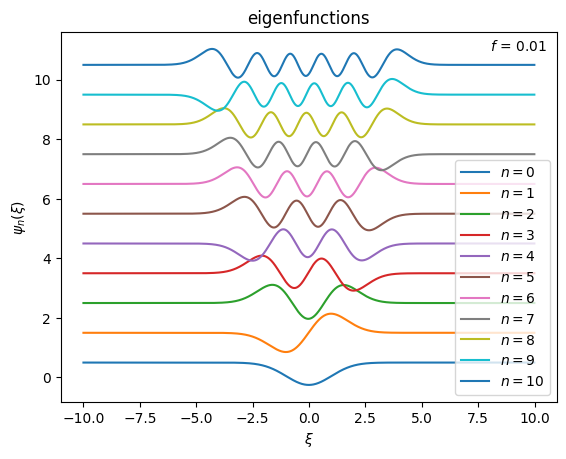

In [54]:
plot_n=[0,1,2,3,4,5,6,7,8,9,10  ] # プロットが乱雑にならないように、固有ベクトルのサブセットを選択する。
plotcolors_exact=['r','b','m','g','k'] # プロット用の色のセットを定義する。
                                       # その他の色については、https://matplotlib.org/stable/gallery/color/named_colors.html を参照.

#plotcolors_calc=['salmon','deepskyblue','violet','lime','slategray']

# 選択した固有ベクトルをループし、1つずつプロットする。
for n in plot_n:
    #eigenfunction_exact = HO_eigenfunction(n,xi) # 正確なHO固有関数
    #sign = np.sign(np.dot(eigenvectors_normalized[:,n],eigenfunction_exact)) # 重なりの符号を計算する
                                                                             # この符号は、正確な波動関数と計算された波動関数
                                                                             # が同じ符号を持つことを保証するために必要
    #plt.plot(xi, eigenfunction_exact, '-', color = plotcolors_exact[n], label='$n=$' + str(n) + ' (exact)')
    plt.plot(xi, n+0.5+eigenvectors_normalized[:,n] , label='$n=$' + str(n))

# 軸ラベルと凡例を追加する
plt.text(
      0.98,  # x座標: グラフの右端に近い位置
      0.95,
      f"$f$ = 0.01",
      transform=plt.gca().transAxes,
      horizontalalignment='right'
  )
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\psi_n(\xi)$')
plt.legend(loc='lower right')
plt.title('eigenfunctions')

# ODE-1 オイラー法/ルンゲ-クッタ法の比較

In [6]:
def Euler(fun, t_span, y0, delta_t):
    '''
    初期値問題
    dy(t)/dt = fun(t,y), y(0)=y0
    を解くためのオイラー法

    入力パラメータ
    -----------
    fun :      関数 f(t,y) は常微分方程式の右辺を返す
    t_span :   初期時間と最終時間を定義する2つのスカラー[t0, t1]の配列
    y0 :       yの初期値
    delta_t :  (スカラー) 時間ステップのサイズ

    出力
    ------------
    t :        解y(t)が評価されている時点の配列
    y :        (配列) 解 y(t)
    '''

    t = np.arange(t_span[0],t_span[1],delta_t)  # 時間点t_span[0]、t_span[0]+delta_t、...t_span[1]の配列
    length_t = len(t)
    y = np.zeros((np.size(y0),length_t))        # 関数y(t)の配列

    y[:,0] = y0    # 初期値を割り当てる

    # オイラー法を使用して時間ステップを実行する
    for i in range(0,length_t-1):
        dydt = fun(t[i],y[:,i])  # dy(t)/dtを計算する
        y[:,i+1] = y[:,i] + delta_t*dydt # オイラー法で前進する

    return t, y

In [7]:
def RungeKutta4(fun, t_span, y0, delta_t):
    '''
    初期値問題
    dy(t)/dt = fun(t,y),    y(0)=y0
    を解くための4次ルンゲ・クッタ法

    入力パラメータ
    -----------
    fun :      関数 f(t,y) は常微分方程式の右辺を返す
    t_span :   初期時間と最終時間を定義する2つのスカラー[t0, t1]の配列
    y0 :       yの初期値
    delta_t :  (スカラー) 時間ステップのサイズ

    出力
    ------------
    t :        解y(t)が評価されている時点の配列
    y :        (配列) 解 y(t)
    '''

    t = np.arange(t_span[0],t_span[1],delta_t)  # 時間点t_span[0]、t_span[0]+delta_t、...t_span[1]の配列
    length_t = len(t)
    y = np.zeros((np.size(y0),length_t))        # 関数y(t)の配列

    y[:,0] = y0    # 初期値を割り当てる

    # ルンゲ-クッタ法を使用して時間ステップを実行する
    for i in range(0,length_t-1):

        q1 = fun(t[i],y[:,i])
        q2 = fun(t[i] + delta_t/2, y[:,i] + delta_t*q1/2)
        q3 = fun(t[i] + delta_t/2, y[:,i] + delta_t*q2/2)
        q4 = fun(t[i] + delta_t, y[:,i] + delta_t*q3)

        y[:,i+1] = y[:,i] + (delta_t/6)*(q1 + 2*q2 + 2*q3 + q4)

    return t, y

In [ ]:
def rateequations(t,y):
    '''
    速度式（10）～（14）の右辺を計算する。

    入力パラメータ
    ----------
    t : スカラー (分単位の時間)
    y : 5つの濃度のNumPy 1D配列 [y_1, y_2, y_3, y_4, y_5]

    出力
    ---------
    dydt : 濃度の時間微分のNumPy 1D配列 [dy_1/dt, dy_2/dt, dy_3/dt, dy_4/dt, dy_5/dt]
    '''
    # 速度定数を定義する
    k_1      = 2.74e-2 # 単位: min^-1
    k_minus1 = 1.51e-2 # 単位: min^-1
    k_2      = 1.34e-2 # 単位: min^-1
    k_minus2 = 6.31e-3 # 単位: min^-1
    k_3      = 2.76e-3 # 単位: min^-1
    k_4      = 205     # 単位: M^-1 min^-1
    k_5      = 1.52e-2 # 単位: min^-1
    k_minus5 = 217     # 単位: M^-1 min^-1

    # 右辺を計算する（インデックスは0から始まるため、y_1 = y[0]、y_2 = y[1]などとなる）
    dy1dt = -(k_1+k_3)*y[0] +k_minus1*y[1]       -k_minus5*y[0]*y[3] +k_5*y[4]
    dy2dt =   k_1*y[0]      -(k_minus1+k_2)*y[1] +k_minus2*y[2]      -k_4*y[1]*y[3]
    dy3dt =   k_2*y[1]      -k_minus2*y[2]
    dy4dt =   k_3*y[0]      -k_4*y[1]*y[3]       -k_minus5*y[0]*y[3] +k_5*y[4]
    dy5dt =   k_4*y[1]*y[3] +k_minus5*y[0]*y[3]  -k_5*y[4]

    dydt=np.array([dy1dt, dy2dt, dy3dt, dy4dt, dy5dt])

    return dydt

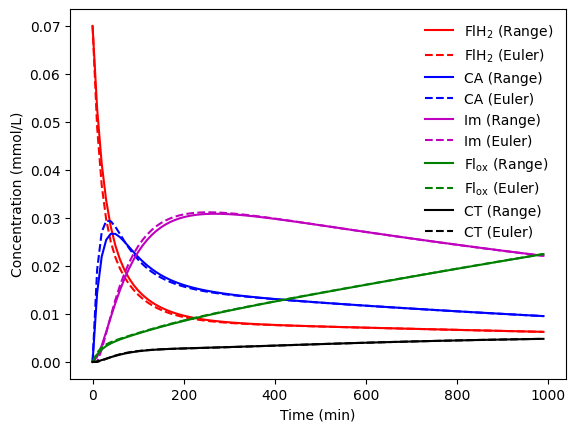

In [ ]:
t0 = 0           # 初期時間
tfinal = 1000     # 最終時間 (分単位)
t_span = [t0, tfinal]
deltat = 10     # 時間のステップサイズ (分単位)
y0 = np.array([7e-5, 0, 0, 0, 0]) # 初期濃度 (M単位)
time, concentrations_r = RungeKutta4(rateequations, t_span, y0, deltat)
time, concentrations_e = Euler(rateequations, t_span, y0, deltat)
substance_labels=['FlH$_2$', 'CA', 'Im', r'Fl$_{\rm ox}$','CT']
plotcolors=['r','b','m','g','k']

# 濃度をプロットする。1000倍して濃度をmmol/L（mM）で表示する。
for i in range(5):
    plt.plot(time, 1e3*concentrations_r[i,:], color = plotcolors[i], label=substance_labels[i] + " (Range)")
    plt.plot(time, 1e3*concentrations_e[i,:], color = plotcolors[i], label=substance_labels[i] + " (Euler)", linestyle='dashed')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mmol/L)')
plt.legend(frameon=False);
plt.show()

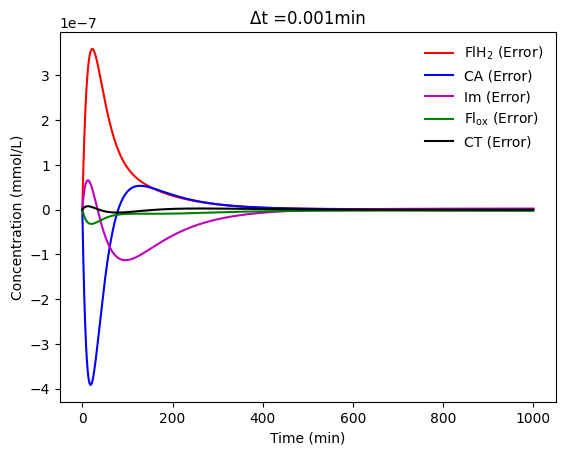

In [ ]:
t0 = 0           # 初期時間
tfinal = 1000     # 最終時間 (分単位)
t_span = [t0, tfinal]
deltat = 0.001     # 時間のステップサイズ (分単位)
y0 = np.array([7e-5, 0, 0, 0, 0]) # 初期濃度 (M単位)
time, concentrations_r = RungeKutta4(rateequations, t_span, y0, deltat)
time, concentrations_e = Euler(rateequations, t_span, y0, deltat)
substance_labels=['FlH$_2$', 'CA', 'Im', r'Fl$_{\rm ox}$','CT']
plotcolors=['r','b','m','g','k']

# 濃度をプロットする。1000倍して濃度をmmol/L（mM）で表示する。
for i in range(5):
    plt.plot(time, 1e3*concentrations_r[i,:]-1e3*concentrations_e[i,:], color = plotcolors[i], label=substance_labels[i] + " (Error)")
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mmol/L)')
plt.title('Δt =' + str(deltat) + 'min')
plt.legend(frameon=False);

# ODE-2


In [ ]:
A = 0.0275
def morse(t, y):
  dydt1 = -(math.exp(-math.sqrt(2*A)*y[1])*(1-math.exp(-math.sqrt(2*A)*y[1])))/(math.sqrt(2*A))
  dydt2 = y[0]
  dydt = np.array([dydt1, dydt2])
  return dydt

<>:8: SyntaxWarning: invalid escape sequence '\z'
<>:8: SyntaxWarning: invalid escape sequence '\z'
/tmp/ipython-input-4135020612.py:8: SyntaxWarning: invalid escape sequence '\z'
  substance_labels=["v", "$\zeta$"]


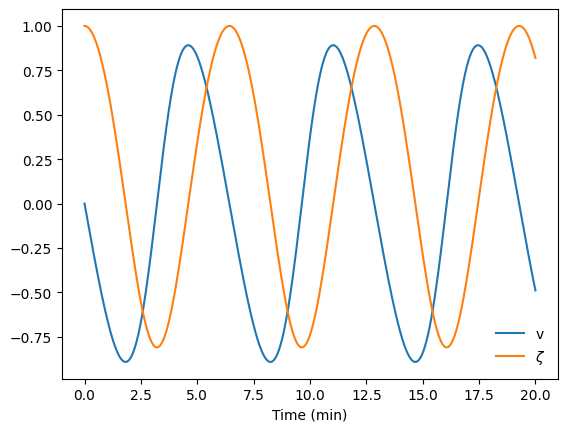

In [ ]:
t0 = 0           # 初期時間
tfinal = 20     # 最終時間 (分単位)
t_span = [t0, tfinal]
deltat = 0.001     # 時間のステップサイズ (分単位)
y0 = np.array([0, 1]) # 初期濃度 (M単位)
time, concentrations_r = RungeKutta4(morse, t_span, y0, deltat)
#time, concentrations_e = Euler(rateequations, t_span, y0, deltat)
substance_labels=["v", "$\zeta$"]

# 濃度をプロットする。1000倍して濃度をmmol/L（mM）で表示する。
for i in range(2):
    plt.plot(time, concentrations_r[i,:],  label=substance_labels[i] )
    #plt.text()
    #plt.plot(time, 1e3*concentrations_e[i,:],  label=substance_labels[i] + " (Euler)", linestyle='dashed')
plt.xlabel('Time (min)')
#plt.ylabel('')
plt.legend(frameon=False);

ValueError: operands could not be broadcast together with shapes (20000,) (2,) 

<>:14: SyntaxWarning: invalid escape sequence '\z'
<>:19: SyntaxWarning: invalid escape sequence '\z'
<>:14: SyntaxWarning: invalid escape sequence '\z'
<>:19: SyntaxWarning: invalid escape sequence '\z'
/tmp/ipython-input-2848012688.py:14: SyntaxWarning: invalid escape sequence '\z'
  substance_labels=["v", "$\zeta$"]
/tmp/ipython-input-2848012688.py:19: SyntaxWarning: invalid escape sequence '\z'
  plt.title("$\zeta_0 =$" + str(j))


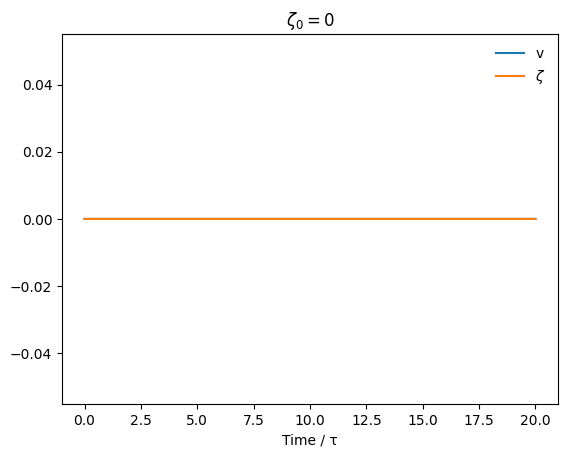

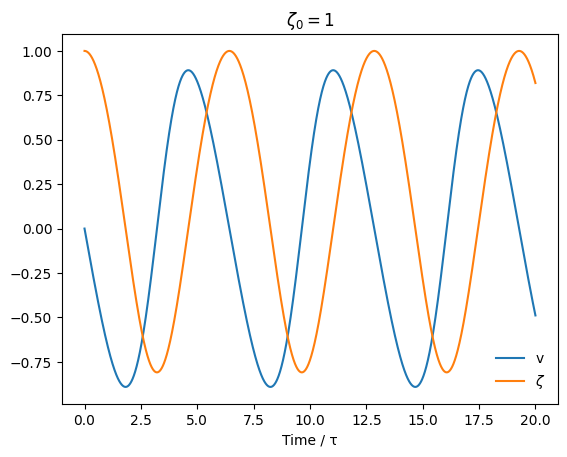

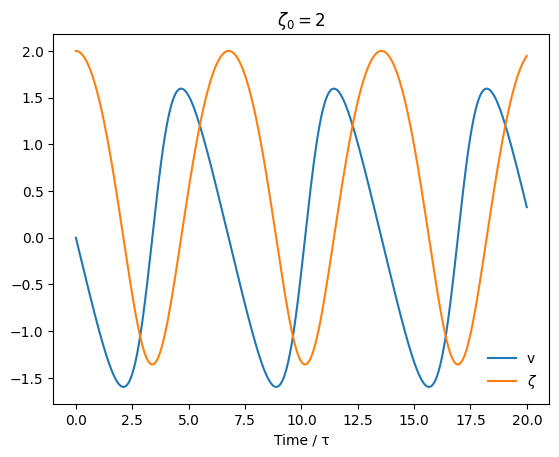

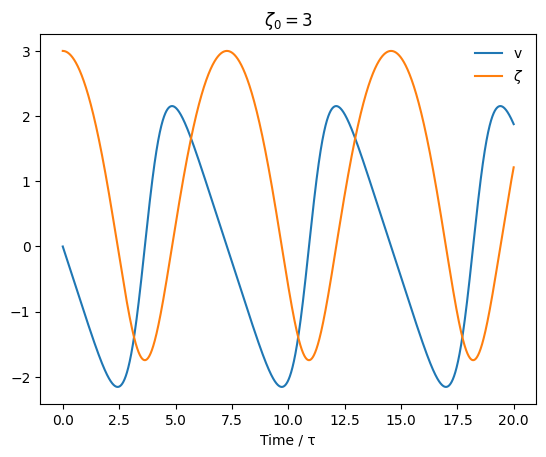

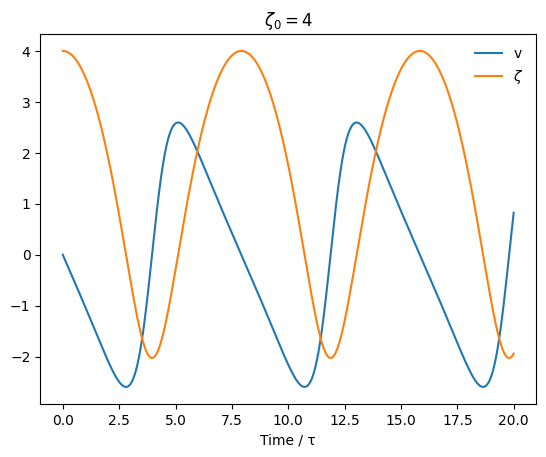

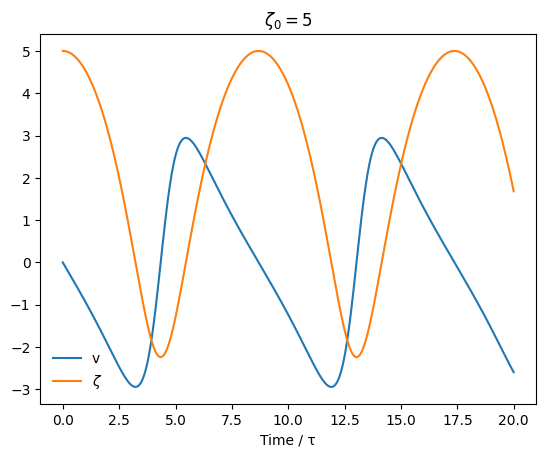

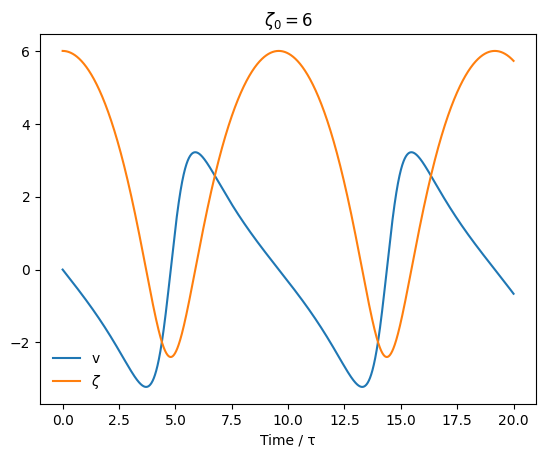

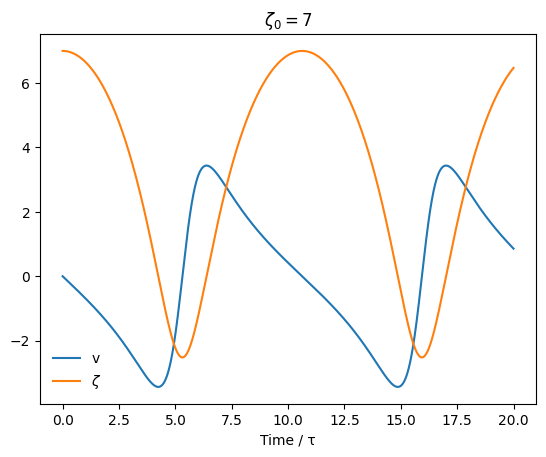

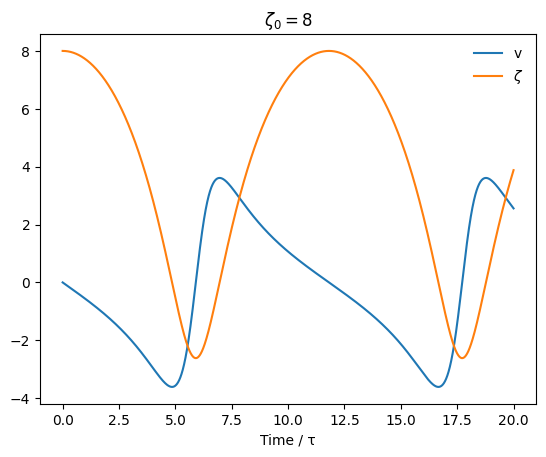

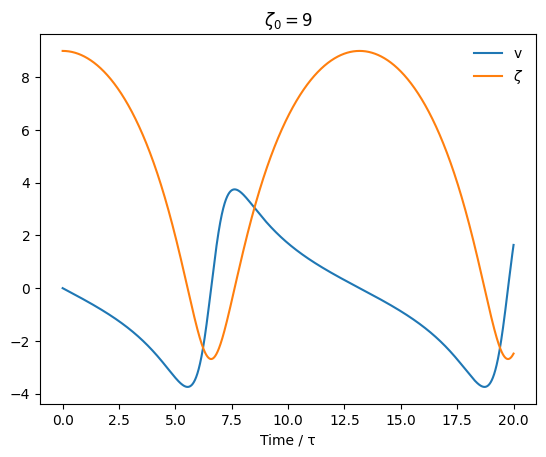

In [ ]:
t0 = 0           # 初期時間
tfinal = 20     # 最終時間 (分単位)
t_span = [t0, tfinal]
deltat = 0.001     # 時間のステップサイズ (分単位)


# 濃度をプロットする。1000倍して濃度をmmol/L（mM）で表示する。
for j in range(10):

  for i in range(2):
        y0 = np.array([0, j]) # 初期濃度 (M単位)
        time, concentrations_r = RungeKutta4(morse, t_span, y0, deltat)
        #time, concentrations_e = Euler(rateequations, t_span, y0, deltat)
        substance_labels=["v", "$\zeta$"]
        plt.plot(time, concentrations_r[i,:],  label=substance_labels[i] )
        #plt.text()
        #plt.plot(time, 1e3*concentrations_e[i,:],  label=substance_labels[i] + " (Euler)", linestyle='dashed')
  plt.xlabel('Time / τ')
  plt.title("$\zeta_0 =$" + str(j))
  #plt.ylabel('')
  plt.legend(frameon=False);
  plt.show()

# ODE-3 BZ反応

In [3]:
def RungeKutta4(fun, t_span, y0, delta_t):
    '''
    初期値問題
    dy(t)/dt = fun(t,y),    y(0)=y0
    を解くための4次ルンゲ・クッタ法

    入力パラメータ
    -----------
    fun :      関数 f(t,y) は常微分方程式の右辺を返す
    t_span :   初期時間と最終時間を定義する2つのスカラー[t0, t1]の配列
    y0 :       yの初期値
    delta_t :  (スカラー) 時間ステップのサイズ

    出力
    ------------
    t :        解y(t)が評価されている時点の配列
    y :        (配列) 解 y(t)
    '''

    t = np.arange(t_span[0],t_span[1],delta_t)  # 時間点t_span[0]、t_span[0]+delta_t、...t_span[1]の配列
    length_t = len(t)
    y = np.zeros((np.size(y0),length_t))        # 関数y(t)の配列

    y[:,0] = y0    # 初期値を割り当てる

    # ルンゲ-クッタ法を使用して時間ステップを実行する
    for i in range(0,length_t-1):

        q1 = fun(t[i],y[:,i])
        q2 = fun(t[i] + delta_t/2, y[:,i] + delta_t*q1/2)
        q3 = fun(t[i] + delta_t/2, y[:,i] + delta_t*q2/2)
        q4 = fun(t[i] + delta_t, y[:,i] + delta_t*q3)

        y[:,i+1] = y[:,i] + (delta_t/6)*(q1 + 2*q2 + 2*q3 + q4)

    return t, y

In [4]:
def rateequations(t,y):
    '''
    速度式（10）～（14）の右辺を計算する。

    入力パラメータ
    ----------
    t : スカラー (分単位の時間)
    y : 5つの濃度のNumPy 1D配列 [y_1, y_2, y_3, y_4, y_5]

    出力
    ---------
    dydt : 濃度の時間微分のNumPy 1D配列 [dy_1/dt, dy_2/dt, dy_3/dt, dy_4/dt, dy_5/dt]
    '''
    # 速度定数を定義する
    k_1      = 2 # 単位: M^-3min^-1
    k_2      = 1e6 # 単位: min^-1
    k_3      = 10 # 単位: min^-1
    k_4      = 2000     # 単位: M^-1 min^-1
    k_5      = 1 # 単位: min^-1

    # 一定濃度の化学種
    BrO3 = 0.06
    H = 0.80
    CH2 = 0.10

    # 右辺を計算する（インデックスは0から始まるため、y_1 = y[0]、y_2 = y[1]などとなる）
    dy1dt = k_1*BrO3*H**2*y[1] - k_2*y[0]*y[1]*H + k_3*BrO3*y[0]*H - 2*k_4*y[0]**2
    dy2dt = -k_1*BrO3*y[1]*H**2 - k_2*y[0]*y[1]*H + 0.6*k_5*y[2]*CH2
    dy3dt = k_3*BrO3*y[0]*H - k_5*y[2]*CH2


    dydt=np.array([dy1dt, dy2dt, dy3dt])

    return dydt

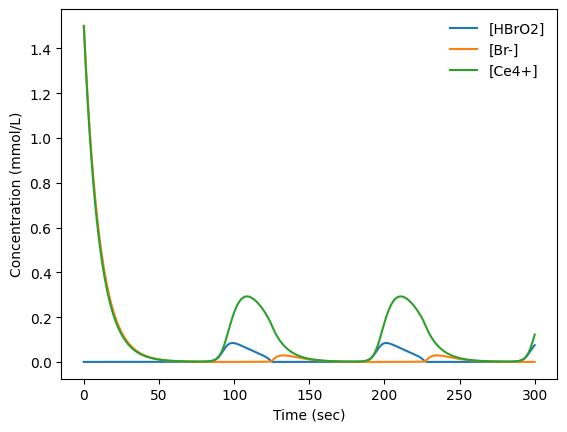

In [4]:

t0 = 0           # 初期時間
tfinal = 300   # 最終時間 (分単位)
t_span = [t0, tfinal]
deltat = 0.001     # 時間のステップサイズ (分単位)
y0 = np.array([0, 0.0015, 0.0015]) # 初期濃度 (M単位)
time, concentrations = RungeKutta4(rateequations, t_span, y0, deltat)
substance_labels=['[HBrO2]', '[Br-]', '[Ce4+]']

# 濃度をプロットする。1000倍して濃度をmmol/L（mM）で表示する。
for i in range(3):
    plt.plot(time, 1e3*concentrations[i,:],  label=substance_labels[i])
plt.xlabel('Time (sec)')
plt.ylabel('Concentration (mmol/L)')
plt.legend(frameon=False);


In [ ]:

t0 = 0           # 初期時間
tfinal = 300   # 最終時間 (分単位)
t_span = [t0, tfinal]
deltat = 0.001     # 時間のステップサイズ (分単位)
y0 = np.array([0, 0.0015, 0.0015]) # 初期濃度 (M単位)
time, concentrations = RungeKutta4(rateequations, t_span, y0, deltat)
substance_labels=['[HBrO2]', '[Br-]', '[Ce4+]']

# 濃度をプロットする。1000倍して濃度をmmol/L（mM）で表示する。
for i in range(3):
    plt.plot(time, 1e3*concentrations[i,:],  label=substance_labels[i])
plt.xlabel('Time (sec)')
plt.ylabel('Concentration (mmol/L)')
plt.legend(frameon=False);

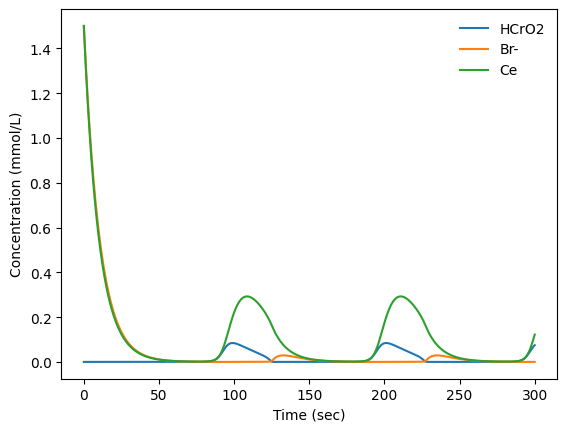

In [ ]:

t0 = 0           # 初期時間
tfinal = 300   # 最終時間 (秒単位)
t_span = [t0, tfinal]
deltat = 0.001     # 時間のステップサイズ (分単位)
y0 = np.array([0, 0.0015, 0.0015]) # 初期濃度 (M単位)
time, concentrations = RungeKutta4(rateequations, t_span, y0, deltat)
substance_labels=['[HBrO2]', '[Br-]', '[Ce4+]']

# 濃度をプロットする。1000倍して濃度をmmol/L（mM）で表示する。
for i in range(3):
    plt.plot(time, 1e3*concentrations[i,:],  label=substance_labels[i])
plt.xlabel('Time (sec)')
plt.ylabel('Concentration (mmol/L)')
plt.legend(frameon=False);

148.14561557769775


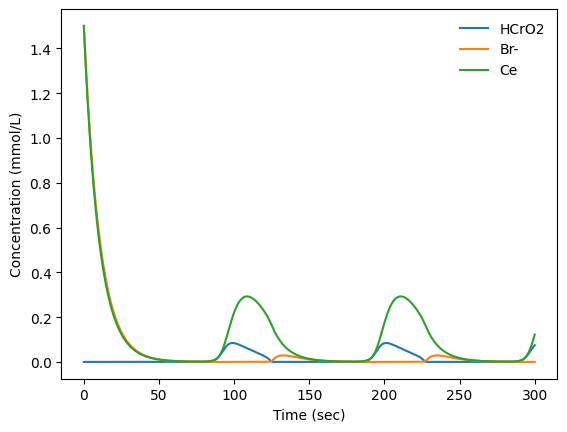

In [ ]:
import time
start = time.time()
t0 = 0           # 初期時間
tfinal = 300   # 最終時間 (秒単位)
t_span = [t0, tfinal]
deltat = 0.0001     # 時間のステップサイズ (分単位)
y0 = np.array([0, 0.0015, 0.0015]) # 初期濃度 (M単位)
time, concentrations = RungeKutta4(rateequations, t_span, y0, deltat)
substance_labels=['[HBrO2]', '[Br-]', '[Ce4+]']

# 濃度をプロットする。1000倍して濃度をmmol/L（mM）で表示する。
for i in range(3):
    plt.plot(time, 1e3*concentrations[i,:],  label=substance_labels[i])
plt.xlabel('Time (sec)')
plt.ylabel('Concentration (mmol/L)')
plt.legend(frameon=False);

import time
end = time.time()
print(end-start)

6.379161357879639


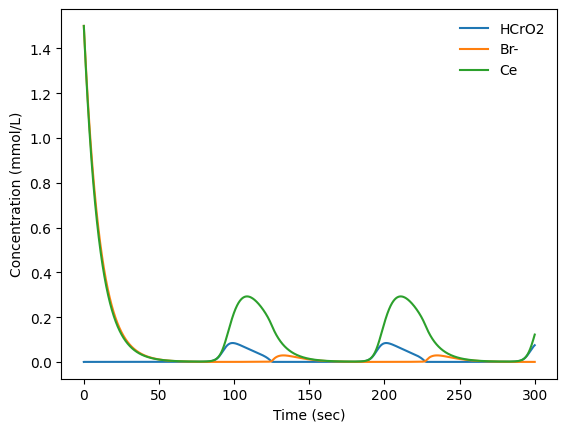

In [ ]:
import time
start = time.time()
t0 = 0           # 初期時間
tfinal = 300   # 最終時間 (秒単位)
t_span = [t0, tfinal]
deltat = 0.002    # 時間のステップサイズ (分単位)
y0 = np.array([0, 0.0015, 0.0015]) # 初期濃度 (M単位)
time, concentrations = RungeKutta4(rateequations, t_span, y0, deltat)
substance_labels=['HCrO2', 'Br-', 'Ce']

# 濃度をプロットする。1000倍して濃度をmmol/L（mM）で表示する。
for i in range(3):
    plt.plot(time, 1e3*concentrations[i,:],  label=substance_labels[i])
plt.xlabel('Time (sec)')
plt.ylabel('Concentration (mmol/L)')
plt.legend(frameon=False);

import time
end = time.time()
print(end-start)

/tmp/ipython-input-2256368898.py:27: RuntimeWarning: overflow encountered in scalar multiply
  dy1dt = k_1*BrO3*H**2*y[1] - k_2*y[0]*y[1]*H + k_3*BrO3*y[0]*H - 2*k_4*y[0]**2
/tmp/ipython-input-2256368898.py:27: RuntimeWarning: overflow encountered in scalar power
  dy1dt = k_1*BrO3*H**2*y[1] - k_2*y[0]*y[1]*H + k_3*BrO3*y[0]*H - 2*k_4*y[0]**2
/tmp/ipython-input-2256368898.py:28: RuntimeWarning: overflow encountered in scalar multiply
  dy2dt = -k_1*BrO3*y[1]*H**2 - k_2*y[0]*y[1]*H + 0.6*k_5*y[2]*CH2
/tmp/ipython-input-2256368898.py:28: RuntimeWarning: invalid value encountered in scalar subtract
  dy2dt = -k_1*BrO3*y[1]*H**2 - k_2*y[0]*y[1]*H + 0.6*k_5*y[2]*CH2
/tmp/ipython-input-2256368898.py:29: RuntimeWarning: invalid value encountered in scalar subtract
  dy3dt = k_3*BrO3*y[0]*H - k_5*y[2]*CH2


7.594470024108887


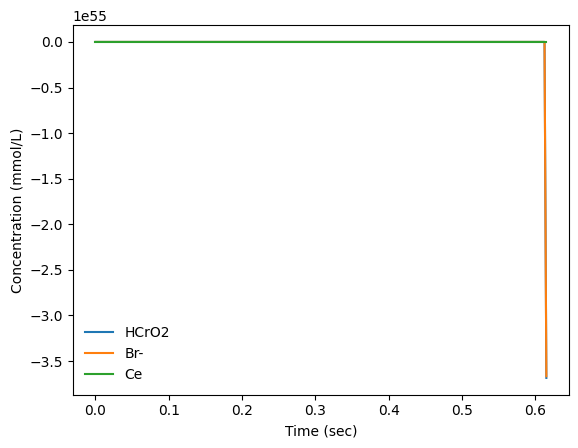

In [ ]:
import time
start = time.time()
t0 = 0           # 初期時間
tfinal = 300   # 最終時間 (秒単位)
t_span = [t0, tfinal]
deltat = 0.0025   # 時間のステップサイズ (分単位)
y0 = np.array([0, 0.0015, 0.0015]) # 初期濃度 (M単位)
time, concentrations = RungeKutta4(rateequations, t_span, y0, deltat)
substance_labels=['HCrO2', 'Br-', 'Ce']

# 濃度をプロットする。1000倍して濃度をmmol/L（mM）で表示する。
for i in range(3):
    plt.plot(time, 1e3*concentrations[i,:],  label=substance_labels[i])
plt.xlabel('Time (sec)')
plt.ylabel('Concentration (mmol/L)')
plt.legend(frameon=False);

import time
end = time.time()
print(end-start)

6.168635845184326


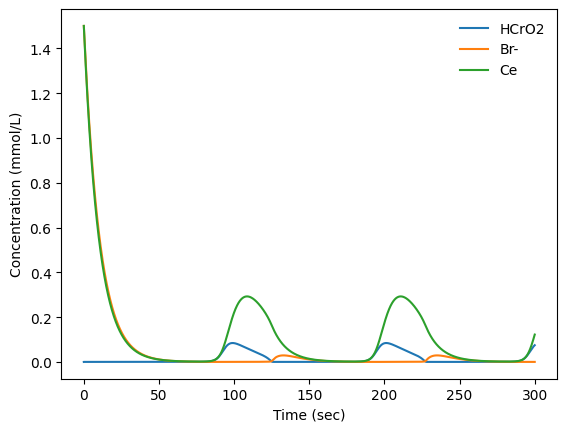

In [ ]:
import time
start = time.time()
t0 = 0           # 初期時間
tfinal = 300   # 最終時間 (秒単位)
t_span = [t0, tfinal]
deltat = 0.0022   # 時間のステップサイズ (分単位)
y0 = np.array([0, 0.0015, 0.0015]) # 初期濃度 (M単位)
time, concentrations = RungeKutta4(rateequations, t_span, y0, deltat)
substance_labels=['HCrO2', 'Br-', 'Ce']

# 濃度をプロットする。1000倍して濃度をmmol/L（mM）で表示する。
for i in range(3):
    plt.plot(time, 1e3*concentrations[i,:],  label=substance_labels[i])
plt.xlabel('Time (sec)')
plt.ylabel('Concentration (mmol/L)')
plt.legend(frameon=False);

import time
end = time.time()
print(end-start)

In [ ]:
def Euler(fun, t_span, y0, delta_t):
    '''
    初期値問題
    dy(t)/dt = fun(t,y), y(0)=y0
    を解くためのオイラー法

    入力パラメータ
    -----------
    fun :      関数 f(t,y) は常微分方程式の右辺を返す
    t_span :   初期時間と最終時間を定義する2つのスカラー[t0, t1]の配列
    y0 :       yの初期値
    delta_t :  (スカラー) 時間ステップのサイズ

    出力
    ------------
    t :        解y(t)が評価されている時点の配列
    y :        (配列) 解 y(t)
    '''

    t = np.arange(t_span[0],t_span[1],delta_t)  # 時間点t_span[0]、t_span[0]+delta_t、...t_span[1]の配列
    length_t = len(t)
    y = np.zeros((np.size(y0),length_t))        # 関数y(t)の配列

    y[:,0] = y0    # 初期値を割り当てる

    # オイラー法を使用して時間ステップを実行する
    for i in range(0,length_t-1):
        dydt = fun(t[i],y[:,i])  # dy(t)/dtを計算する
        y[:,i+1] = y[:,i] + delta_t*dydt # オイラー法で前進する

    return t, y

159.31150603294373


/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


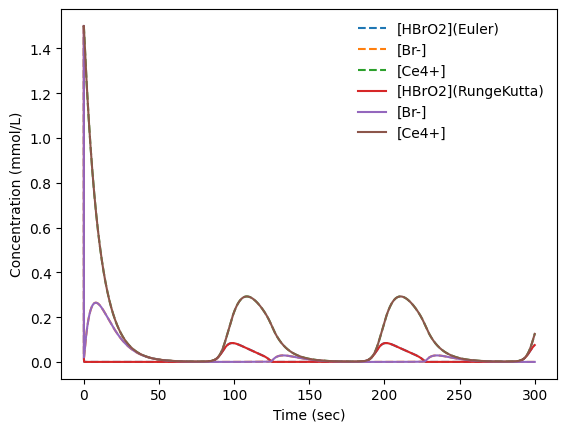

In [8]:
import time
start = time.time()

t0 = 0          # 初期時間
tfinal = 300     # 最終時間
t_span = [t0, tfinal]
deltat = 0.0001     # 時間のステップサイズ
y0 = np.array([0.0015, 0.0015, 0.0015]) # 初期条件

time, concentrations = Euler(rateequations, t_span, y0, deltat)
substance_labels=['[HBrO2](Euler)', '[Br-]', '[Ce4+]']

# 濃度をプロットする。1000倍して濃度をmmol/L（mM）で表示する。
for i in range(3):
    plt.plot(time, 1e3*concentrations[i,:],  label=substance_labels[i], linestyle='dashed')

time, concentrations = RungeKutta4(rateequations, t_span, y0, deltat)
substance_labels=['[HBrO2](RungeKutta)', '[Br-]', '[Ce4+]']

# 濃度をプロットする。1000倍して濃度をmmol/L（mM）で表示する。
for i in range(3):
    plt.plot(time, 1e3*concentrations[i,:],  label=substance_labels[i])
plt.xlabel('Time (sec)')
plt.ylabel('Concentration (mmol/L)')
plt.legend(frameon=False);

import time
end = time.time()
print(end-start)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


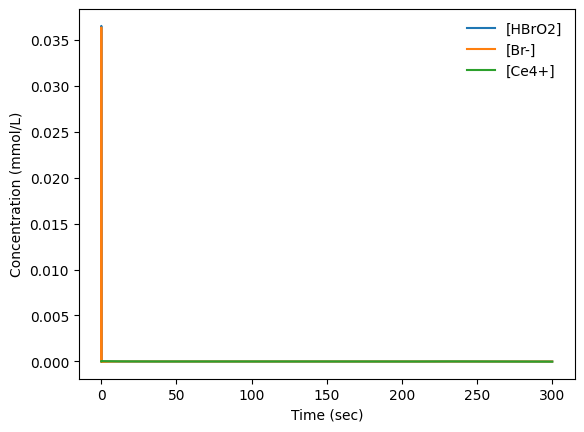

In [28]:
t0 = 0          # 初期時間
tfinal = 300     # 最終時間
t_span = [t0, tfinal]
deltat = 0.0001     # 時間のステップサイズ
y0 = np.array([0.0015, 0.0015, 0.0015]) # 初期条件

time, concentrations_e = Euler(rateequations, t_span, y0, deltat)
#substance_labels=['[HBrO2](Euler)', '[Br-]', '[Ce4+]']

# 濃度をプロットする。1000倍して濃度をmmol/L（mM）で表示する。
# for i in range(3):
#     plt.plot(time, 1e3*concentrations[i,:],  label=substance_labels[i], linestyle='dashed')

time, concentrations_r = RungeKutta4(rateequations, t_span, y0, deltat)
substance_labels=['[HBrO2]', '[Br-]', '[Ce4+]']

concentrations = concentrations_r - concentrations_e

# 濃度をプロットする。1000倍して濃度をmmol/L（mM）で表示する。
for i in range(3):
    plt.plot(time[1::], 1e3*concentrations[i,1::],  label=substance_labels[i])
plt.xlabel('Time (sec)')
plt.ylabel('Concentration (mmol/L)')
plt.legend(frameon=False);

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


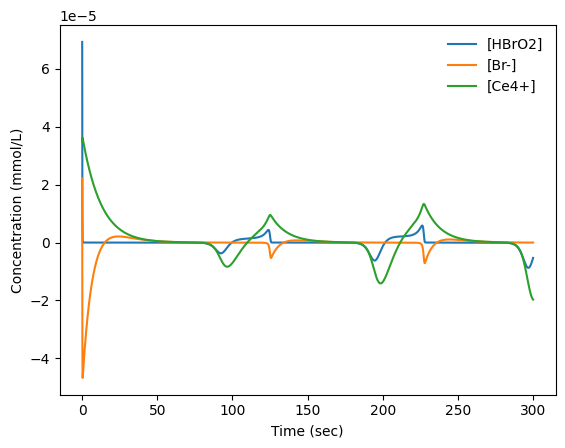

In [30]:
for i in range(3):
    plt.plot(time[1000::], 1e3*concentrations[i,1000::],  label=substance_labels[i])
plt.xlabel('Time (sec)')
plt.ylabel('Concentration (mmol/L)')
plt.legend(frameon=False);

/tmp/ipython-input-2256368898.py:27: RuntimeWarning: overflow encountered in scalar multiply
  dy1dt = k_1*BrO3*H**2*y[1] - k_2*y[0]*y[1]*H + k_3*BrO3*y[0]*H - 2*k_4*y[0]**2
/tmp/ipython-input-2256368898.py:27: RuntimeWarning: overflow encountered in scalar power
  dy1dt = k_1*BrO3*H**2*y[1] - k_2*y[0]*y[1]*H + k_3*BrO3*y[0]*H - 2*k_4*y[0]**2
/tmp/ipython-input-2256368898.py:28: RuntimeWarning: overflow encountered in scalar multiply
  dy2dt = -k_1*BrO3*y[1]*H**2 - k_2*y[0]*y[1]*H + 0.6*k_5*y[2]*CH2
/tmp/ipython-input-2256368898.py:28: RuntimeWarning: invalid value encountered in scalar subtract
  dy2dt = -k_1*BrO3*y[1]*H**2 - k_2*y[0]*y[1]*H + 0.6*k_5*y[2]*CH2
/tmp/ipython-input-2256368898.py:29: RuntimeWarning: invalid value encountered in scalar subtract
  dy3dt = k_3*BrO3*y[0]*H - k_5*y[2]*CH2


145.89505743980408


/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


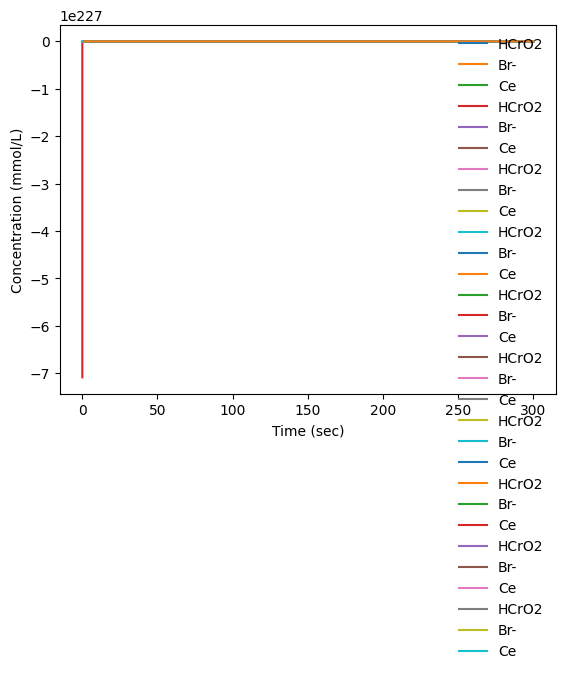

In [ ]:
import time
start = time.time()
t0 = 0           # 初期時間
tfinal = 300   # 最終時間 (秒単位)
t_span = [t0, tfinal]
deltat = 0.0005   # 時間のステップサイズ (分単位)


for j in range(10):
  y0 = np.array([0, 0.001*j, 0.0015]) # 初期濃度 (M単位)
  time, concentrations = RungeKutta4(rateequations, t_span, y0, deltat)
  substance_labels=['HCrO2', 'Br-', 'Ce']
  for i in range(3):
      plt.plot(time, 1e3*concentrations[i,:],  label=substance_labels[i])
  plt.xlabel('Time (sec)')
  plt.ylabel('Concentration (mmol/L)')
  plt.legend('[Br-] = $0.001*j$ M')
  plt.show()

import time
end = time.time()
print(end-start)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


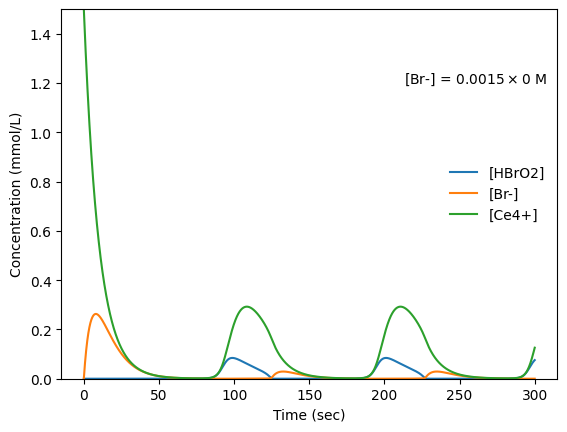

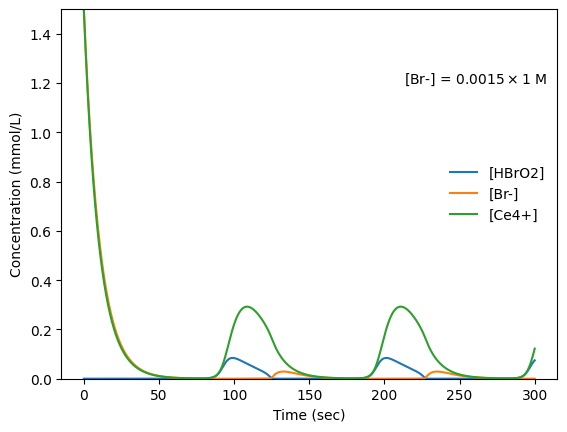

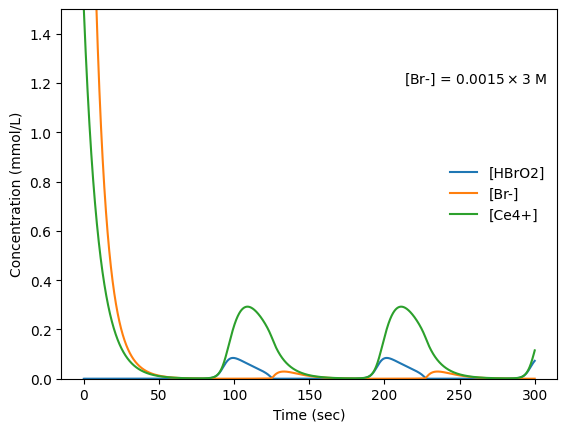

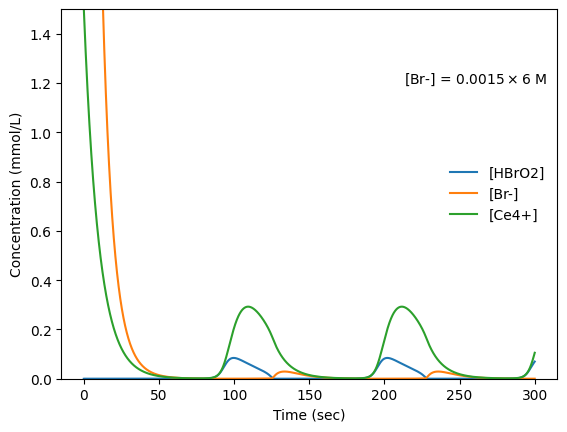

In [10]:
t0 = 0           # 初期時間
tfinal = 300   # 最終時間 (秒単位)
t_span = [t0, tfinal]
deltat = 0.0001   # 時間のステップサイズ (分単位)


for j in [0,1,3,6]:
  y0 = np.array([0, 0.0015*j, 0.0015]) # 初期濃度 (M単位)
  time, concentrations = RungeKutta4(rateequations, t_span, y0, deltat)
  substance_labels=['[HBrO2]', '[Br-]', '[Ce4+]']
  for i in range(3):
      plt.plot(time, 1e3*concentrations[i,:],  label=substance_labels[i])
  plt.xlabel('Time (sec)')
  plt.ylabel('Concentration (mmol/L)')
  plt.ylim(0, 1.5)

  # 修正点 1: 座標の指定
  # 修正点 2: 座標指定には、グラフのx軸とy軸のスケールに合った数値を直接渡す。
  # (0.9, 0.1) は、軸座標系 (Axes coordinates) で右下を意味します。

  plt.text(
      0.98,  # x座標: グラフの右端に近い位置
      0.8,  # y座標: グラフの下端に近い位置
      f"[Br-] = $0.0015 \\times {j}$ M",
      transform=plt.gca().transAxes,
      horizontalalignment='right'
  )

  plt.legend(frameon=False)
  plt.show()

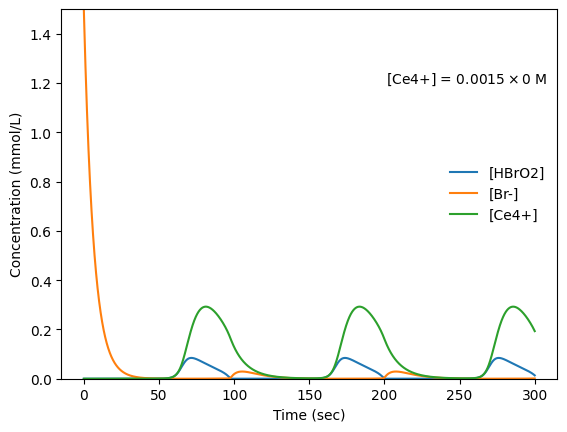

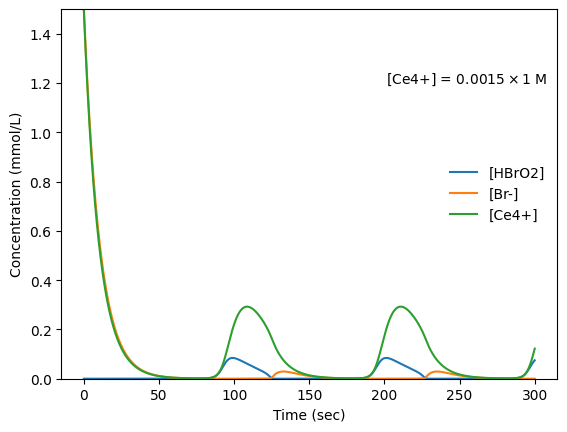

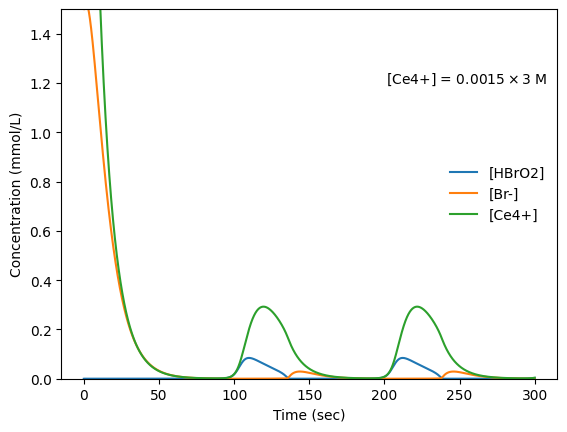

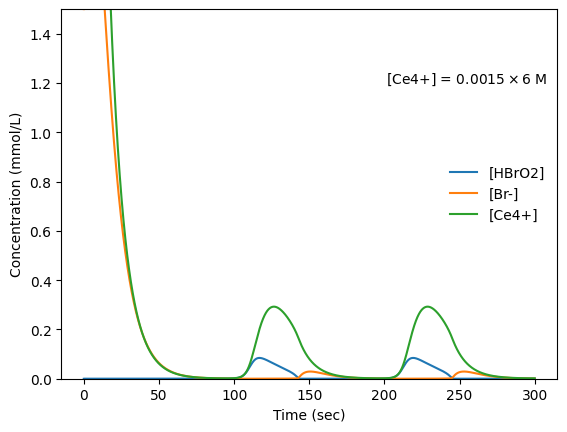

In [11]:
t0 = 0           # 初期時間
tfinal = 300   # 最終時間 (秒単位)
t_span = [t0, tfinal]
deltat = 0.0001   # 時間のステップサイズ (分単位)


for j in [0,1,3,6]:
  y0 = np.array([0, 0.0015, 0.0015*j]) # 初期濃度 (M単位)
  time, concentrations = RungeKutta4(rateequations, t_span, y0, deltat)
  substance_labels=['[HBrO2]', '[Br-]', '[Ce4+]']
  for i in range(3):
      plt.plot(time, 1e3*concentrations[i,:],  label=substance_labels[i])
  plt.xlabel('Time (sec)')
  plt.ylabel('Concentration (mmol/L)')
  plt.ylim(0, 1.5)

  # 修正点 1: 座標の指定
  # 修正点 2: 座標指定には、グラフのx軸とy軸のスケールに合った数値を直接渡す。
  # (0.9, 0.1) は、軸座標系 (Axes coordinates) で右下を意味します。

  plt.text(
      0.98,  # x座標: グラフの右端に近い位置
      0.8,  # y座標: グラフの下端に近い位置
      f"[Ce4+] = $0.0015 \\times {j}$ M",
      transform=plt.gca().transAxes,
      horizontalalignment='right'
  )

  plt.legend(frameon=False)
  plt.show()

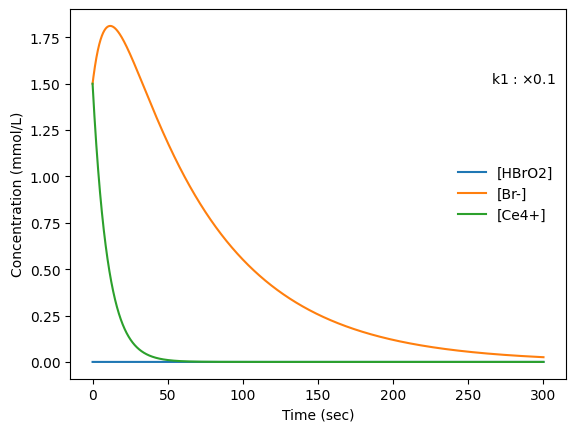

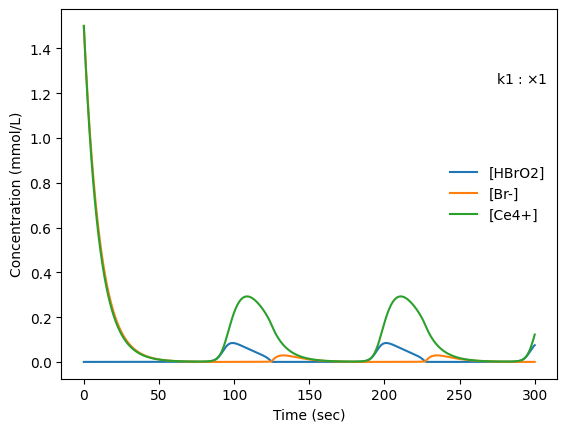

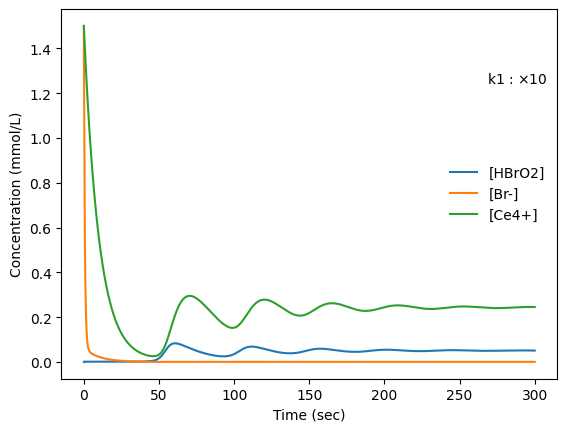

In [19]:
for i in [0.1, 1, 10]:
  def rateequations(t,y):
      '''
      速度式（10）～（14）の右辺を計算する。

      入力パラメータ
      ----------
      t : スカラー (分単位の時間)
      y : 5つの濃度のNumPy 1D配列 [y_1, y_2, y_3, y_4, y_5]

      出力
      ---------
      dydt : 濃度の時間微分のNumPy 1D配列 [dy_1/dt, dy_2/dt, dy_3/dt, dy_4/dt, dy_5/dt]
      '''
      # 速度定数を定義する
      k_1      = 2*i # 単位: M^-3min^-1
      k_2      = 1e6 # 単位: min^-1
      k_3      = 10 # 単位: min^-1
      k_4      = 2000     # 単位: M^-1 min^-1
      k_5      = 1 # 単位: min^-1

      # 一定濃度の化学種
      BrO3 = 0.06
      H = 0.80
      CH2 = 0.10

      # 右辺を計算する（インデックスは0から始まるため、y_1 = y[0]、y_2 = y[1]などとなる）
      dy1dt = k_1*BrO3*H**2*y[1] - k_2*y[0]*y[1]*H + k_3*BrO3*y[0]*H - 2*k_4*y[0]**2
      dy2dt = -k_1*BrO3*y[1]*H**2 - k_2*y[0]*y[1]*H + 0.6*k_5*y[2]*CH2
      dy3dt = k_3*BrO3*y[0]*H - k_5*y[2]*CH2


      dydt=np.array([dy1dt, dy2dt, dy3dt])

      return dydt

  t0 = 0           # 初期時間
  tfinal = 300   # 最終時間 (分単位)
  t_span = [t0, tfinal]
  deltat = 0.001     # 時間のステップサイズ (分単位)
  y0 = np.array([0, 0.0015, 0.0015]) # 初期濃度 (M単位)
  time, concentrations = RungeKutta4(rateequations, t_span, y0, deltat)
  substance_labels=['[HBrO2]', '[Br-]', '[Ce4+]']
  plt.text(
      0.98,  # x座標: グラフの右端に近い位置
      0.8,  # y座標: グラフの下端に近い位置
      f"k1 : $\\times {i}$",
      transform=plt.gca().transAxes,
      horizontalalignment='right'
  )

  # 濃度をプロットする。1000倍して濃度をmmol/L（mM）で表示する。
  for j in range(3):
      plt.plot(time, 1e3*concentrations[j,:],  label=substance_labels[j])
  plt.xlabel('Time (sec)')
  plt.ylabel('Concentration (mmol/L)')
  plt.legend(frameon=False);
  plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


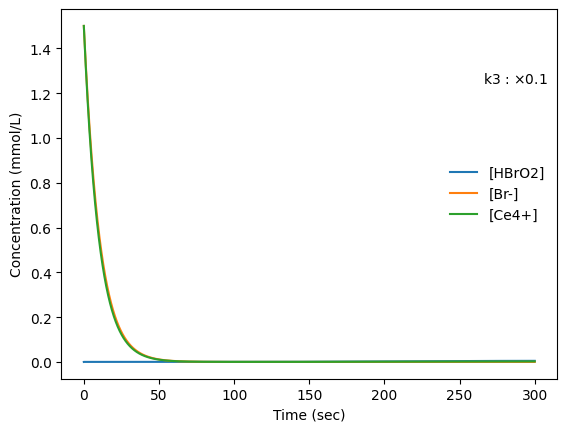

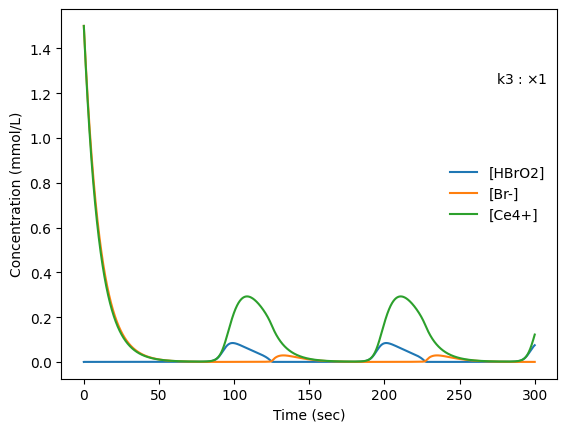

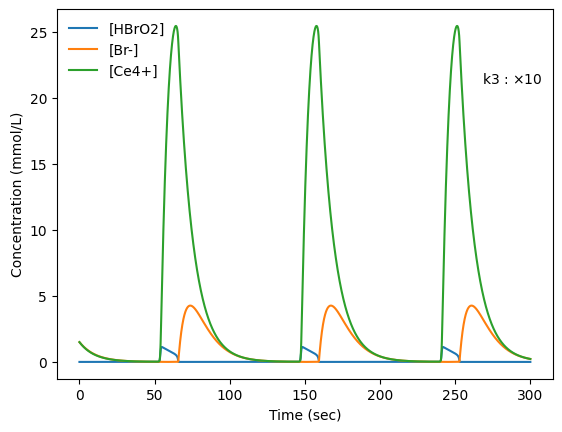

In [24]:
for i in [0.1, 1, 10]:
  def rateequations(t,y):
      '''
      速度式（10）～（14）の右辺を計算する。

      入力パラメータ
      ----------
      t : スカラー (分単位の時間)
      y : 5つの濃度のNumPy 1D配列 [y_1, y_2, y_3, y_4, y_5]

      出力
      ---------
      dydt : 濃度の時間微分のNumPy 1D配列 [dy_1/dt, dy_2/dt, dy_3/dt, dy_4/dt, dy_5/dt]
      '''
      # 速度定数を定義する
      k_1      = 2 # 単位: M^-3min^-1
      k_2      = 1e6 # 単位: min^-1
      k_3      = 10*i # 単位: min^-1
      k_4      = 2000     # 単位: M^-1 min^-1
      k_5      = 1 # 単位: min^-1

      # 一定濃度の化学種
      BrO3 = 0.06
      H = 0.80
      CH2 = 0.10

      # 右辺を計算する（インデックスは0から始まるため、y_1 = y[0]、y_2 = y[1]などとなる）
      dy1dt = k_1*BrO3*H**2*y[1] - k_2*y[0]*y[1]*H + k_3*BrO3*y[0]*H - 2*k_4*y[0]**2
      dy2dt = -k_1*BrO3*y[1]*H**2 - k_2*y[0]*y[1]*H + 0.6*k_5*y[2]*CH2
      dy3dt = k_3*BrO3*y[0]*H - k_5*y[2]*CH2


      dydt=np.array([dy1dt, dy2dt, dy3dt])

      return dydt

  t0 = 0           # 初期時間
  tfinal = 300   # 最終時間 (分単位)
  t_span = [t0, tfinal]
  deltat = 0.0001     # 時間のステップサイズ (分単位)
  y0 = np.array([0, 0.0015, 0.0015]) # 初期濃度 (M単位)
  time, concentrations = RungeKutta4(rateequations, t_span, y0, deltat)
  substance_labels=['[HBrO2]', '[Br-]', '[Ce4+]']
  plt.text(
      0.98,  # x座標: グラフの右端に近い位置
      0.8,  # y座標: グラフの下端に近い位置
      f"k3 : $\\times {i}$",
      transform=plt.gca().transAxes,
      horizontalalignment='right'
  )

  # 濃度をプロットする。1000倍して濃度をmmol/L（mM）で表示する。
  for i in range(3):
      plt.plot(time, 1e3*concentrations[i,:],  label=substance_labels[i])
  plt.xlabel('Time (sec)')
  plt.ylabel('Concentration (mmol/L)')
  plt.legend(frameon=False);
  plt.show()

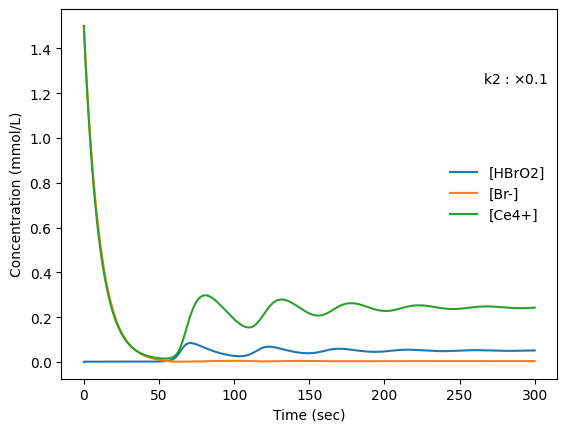

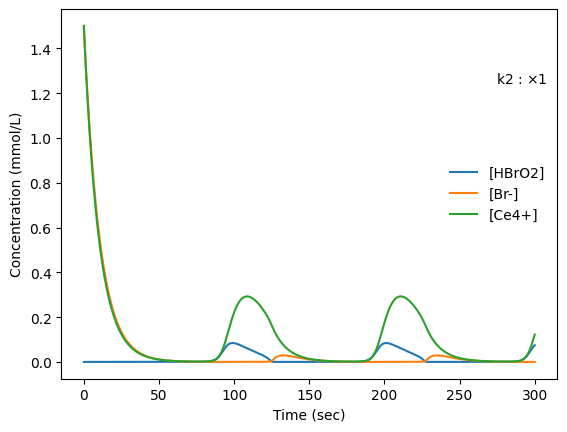

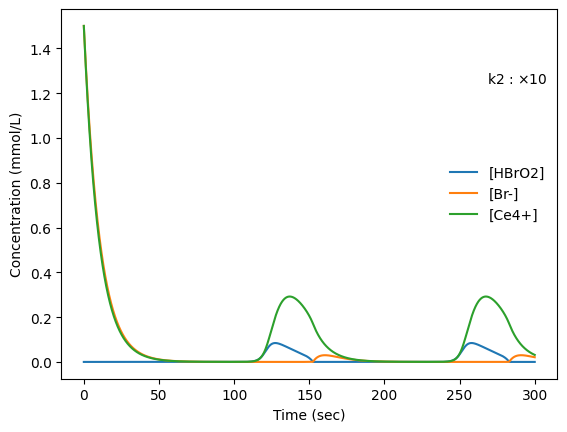

In [25]:
for i in [0.1, 1, 10]:
  def rateequations(t,y):
      '''
      速度式（10）～（14）の右辺を計算する。

      入力パラメータ
      ----------
      t : スカラー (分単位の時間)
      y : 5つの濃度のNumPy 1D配列 [y_1, y_2, y_3, y_4, y_5]

      出力
      ---------
      dydt : 濃度の時間微分のNumPy 1D配列 [dy_1/dt, dy_2/dt, dy_3/dt, dy_4/dt, dy_5/dt]
      '''
      # 速度定数を定義する
      k_1      = 2 # 単位: M^-3min^-1
      k_2      = 1e6*i # 単位: min^-1
      k_3      = 10 # 単位: min^-1
      k_4      = 2000     # 単位: M^-1 min^-1
      k_5      = 1 # 単位: min^-1

      # 一定濃度の化学種
      BrO3 = 0.06
      H = 0.80
      CH2 = 0.10

      # 右辺を計算する（インデックスは0から始まるため、y_1 = y[0]、y_2 = y[1]などとなる）
      dy1dt = k_1*BrO3*H**2*y[1] - k_2*y[0]*y[1]*H + k_3*BrO3*y[0]*H - 2*k_4*y[0]**2
      dy2dt = -k_1*BrO3*y[1]*H**2 - k_2*y[0]*y[1]*H + 0.6*k_5*y[2]*CH2
      dy3dt = k_3*BrO3*y[0]*H - k_5*y[2]*CH2


      dydt=np.array([dy1dt, dy2dt, dy3dt])

      return dydt

  t0 = 0           # 初期時間
  tfinal = 300   # 最終時間 (分単位)
  t_span = [t0, tfinal]
  deltat = 0.0001     # 時間のステップサイズ (分単位)
  y0 = np.array([0, 0.0015, 0.0015]) # 初期濃度 (M単位)
  time, concentrations = RungeKutta4(rateequations, t_span, y0, deltat)
  substance_labels=['[HBrO2]', '[Br-]', '[Ce4+]']
  plt.text(
      0.98,  # x座標: グラフの右端に近い位置
      0.8,  # y座標: グラフの下端に近い位置
      f"k2 : $\\times {i}$",
      transform=plt.gca().transAxes,
      horizontalalignment='right'
  )

  # 濃度をプロットする。1000倍して濃度をmmol/L（mM）で表示する。
  for i in range(3):
      plt.plot(time, 1e3*concentrations[i,:],  label=substance_labels[i])
  plt.xlabel('Time (sec)')
  plt.ylabel('Concentration (mmol/L)')
  plt.legend(frameon=False);
  plt.show()

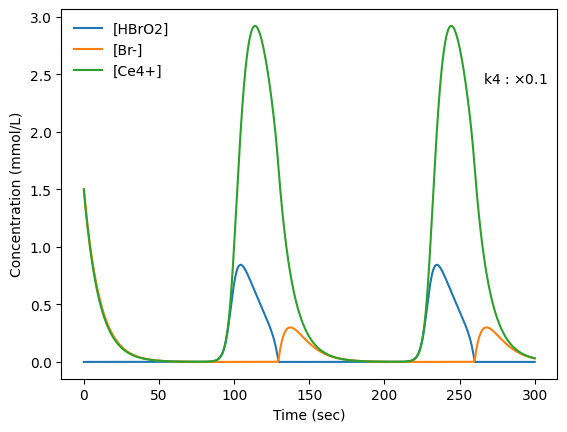

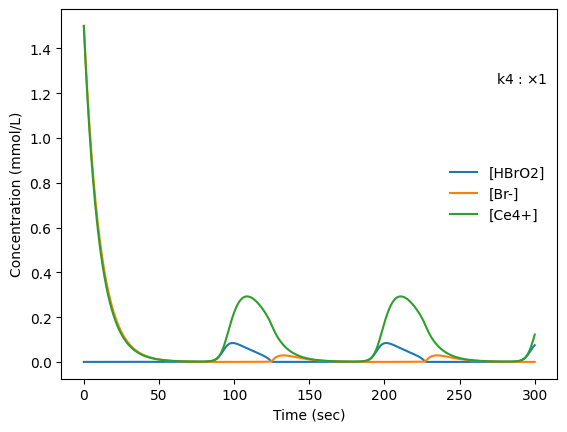

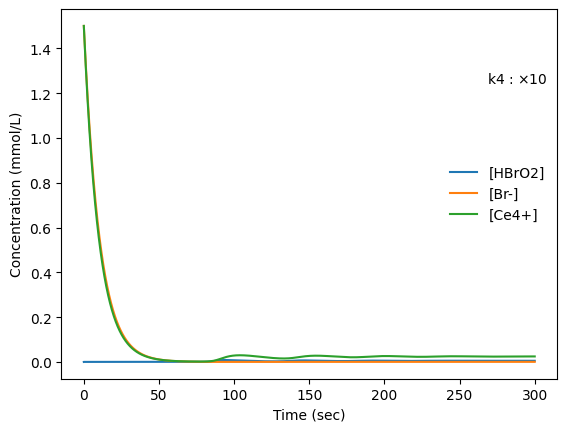

In [26]:
for i in [0.1, 1, 10]:
  def rateequations(t,y):
      '''
      速度式（10）～（14）の右辺を計算する。

      入力パラメータ
      ----------
      t : スカラー (分単位の時間)
      y : 5つの濃度のNumPy 1D配列 [y_1, y_2, y_3, y_4, y_5]

      出力
      ---------
      dydt : 濃度の時間微分のNumPy 1D配列 [dy_1/dt, dy_2/dt, dy_3/dt, dy_4/dt, dy_5/dt]
      '''
      # 速度定数を定義する
      k_1      = 2 # 単位: M^-3min^-1
      k_2      = 1e6 # 単位: min^-1
      k_3      = 10 # 単位: min^-1
      k_4      = 2000*i     # 単位: M^-1 min^-1
      k_5      = 1 # 単位: min^-1

      # 一定濃度の化学種
      BrO3 = 0.06
      H = 0.80
      CH2 = 0.10

      # 右辺を計算する（インデックスは0から始まるため、y_1 = y[0]、y_2 = y[1]などとなる）
      dy1dt = k_1*BrO3*H**2*y[1] - k_2*y[0]*y[1]*H + k_3*BrO3*y[0]*H - 2*k_4*y[0]**2
      dy2dt = -k_1*BrO3*y[1]*H**2 - k_2*y[0]*y[1]*H + 0.6*k_5*y[2]*CH2
      dy3dt = k_3*BrO3*y[0]*H - k_5*y[2]*CH2


      dydt=np.array([dy1dt, dy2dt, dy3dt])

      return dydt

  t0 = 0           # 初期時間
  tfinal = 300   # 最終時間 (分単位)
  t_span = [t0, tfinal]
  deltat = 0.0001     # 時間のステップサイズ (分単位)
  y0 = np.array([0, 0.0015, 0.0015]) # 初期濃度 (M単位)
  time, concentrations = RungeKutta4(rateequations, t_span, y0, deltat)
  substance_labels=['[HBrO2]', '[Br-]', '[Ce4+]']
  plt.text(
      0.98,  # x座標: グラフの右端に近い位置
      0.8,  # y座標: グラフの下端に近い位置
      f"k4 : $\\times {i}$",
      transform=plt.gca().transAxes,
      horizontalalignment='right'
  )

  # 濃度をプロットする。1000倍して濃度をmmol/L（mM）で表示する。
  for i in range(3):
      plt.plot(time, 1e3*concentrations[i,:],  label=substance_labels[i])
  plt.xlabel('Time (sec)')
  plt.ylabel('Concentration (mmol/L)')
  plt.legend(frameon=False);
  plt.show()

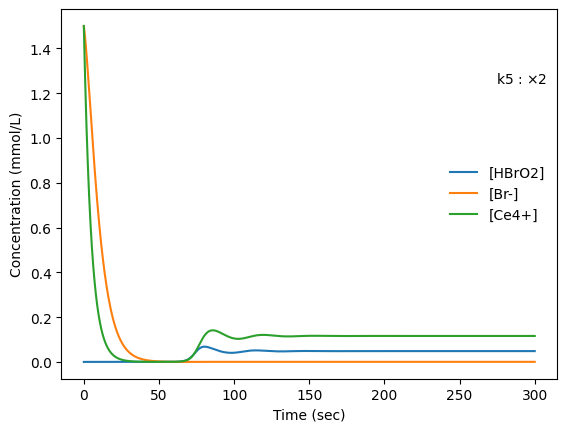

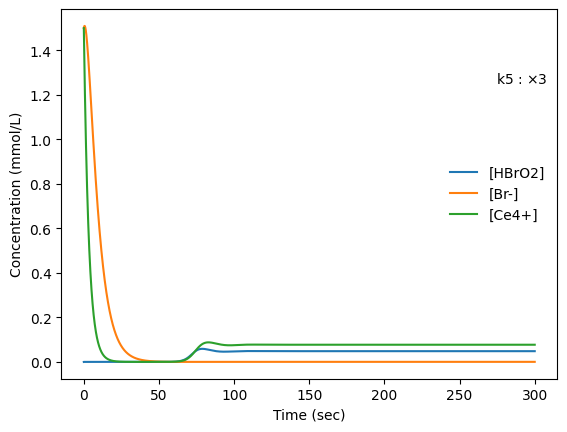

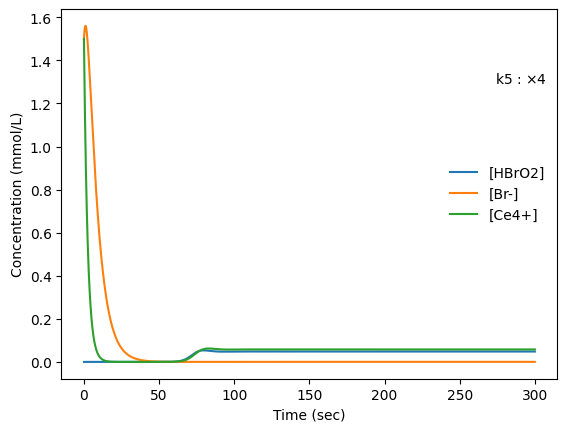

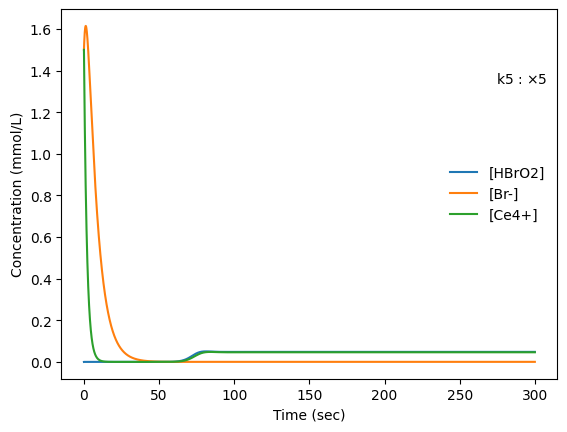

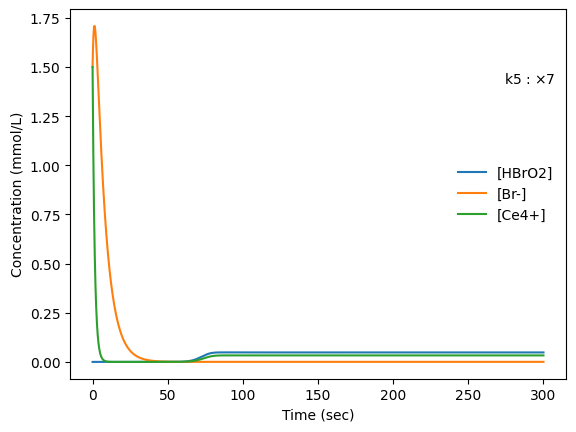

In [6]:
for i in [2, 3, 4, 5, 7]:
  def rateequations(t,y):
      '''
      速度式（10）～（14）の右辺を計算する。

      入力パラメータ
      ----------
      t : スカラー (分単位の時間)
      y : 5つの濃度のNumPy 1D配列 [y_1, y_2, y_3, y_4, y_5]

      出力
      ---------
      dydt : 濃度の時間微分のNumPy 1D配列 [dy_1/dt, dy_2/dt, dy_3/dt, dy_4/dt, dy_5/dt]
      '''
      # 速度定数を定義する
      k_1      = 2 # 単位: M^-3min^-1
      k_2      = 1e6 # 単位: min^-1
      k_3      = 10 # 単位: min^-1
      k_4      = 2000     # 単位: M^-1 min^-1
      k_5      = 1*i # 単位: min^-1

      # 一定濃度の化学種
      BrO3 = 0.06
      H = 0.80
      CH2 = 0.10

      # 右辺を計算する（インデックスは0から始まるため、y_1 = y[0]、y_2 = y[1]などとなる）
      dy1dt = k_1*BrO3*H**2*y[1] - k_2*y[0]*y[1]*H + k_3*BrO3*y[0]*H - 2*k_4*y[0]**2
      dy2dt = -k_1*BrO3*y[1]*H**2 - k_2*y[0]*y[1]*H + 0.6*k_5*y[2]*CH2
      dy3dt = k_3*BrO3*y[0]*H - k_5*y[2]*CH2


      dydt=np.array([dy1dt, dy2dt, dy3dt])

      return dydt

  t0 = 0           # 初期時間
  tfinal = 300   # 最終時間 (分単位)
  t_span = [t0, tfinal]
  deltat = 0.0001     # 時間のステップサイズ (分単位)
  y0 = np.array([0, 0.0015, 0.0015]) # 初期濃度 (M単位)
  time, concentrations = RungeKutta4(rateequations, t_span, y0, deltat)
  substance_labels=['[HBrO2]', '[Br-]', '[Ce4+]']
  plt.text(
      0.98,  # x座標: グラフの右端に近い位置
      0.8,  # y座標: グラフの下端に近い位置
      f"k5 : $\\times {i}$",
      transform=plt.gca().transAxes,
      horizontalalignment='right'
  )

  # 濃度をプロットする。1000倍して濃度をmmol/L（mM）で表示する。
  for i in range(3):
      plt.plot(time, 1e3*concentrations[i,:],  label=substance_labels[i])
  plt.xlabel('Time (sec)')
  plt.ylabel('Concentration (mmol/L)')
  plt.legend(frameon=False);
  plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


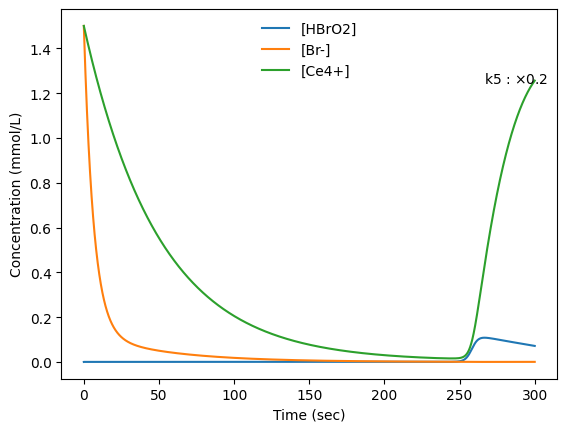

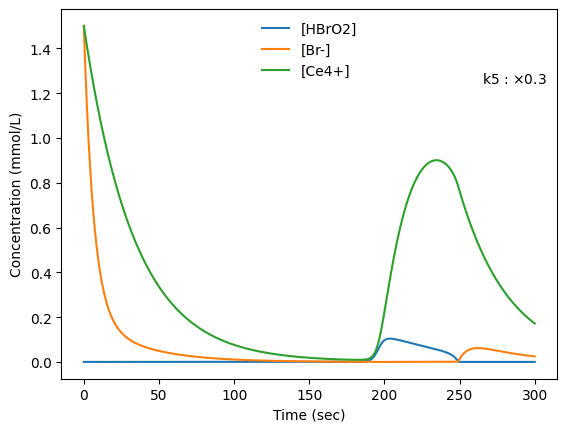

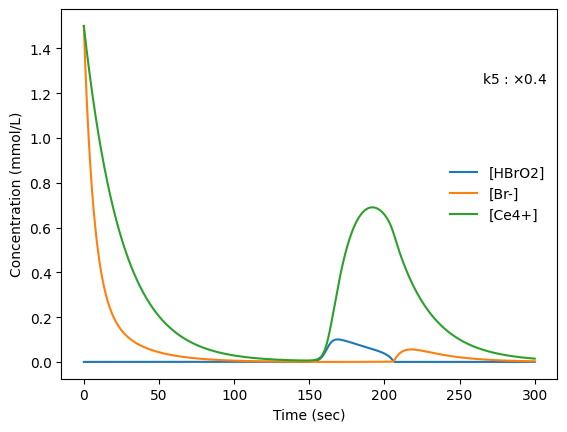

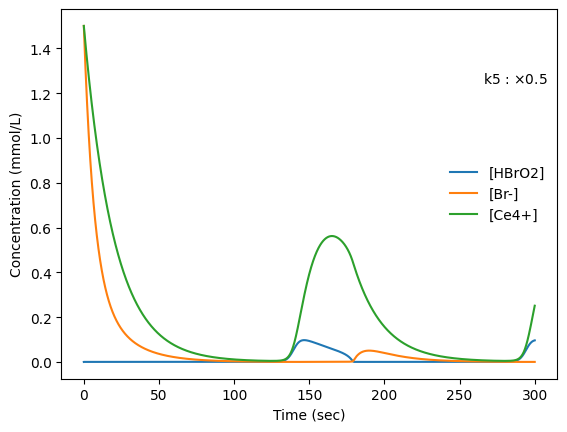

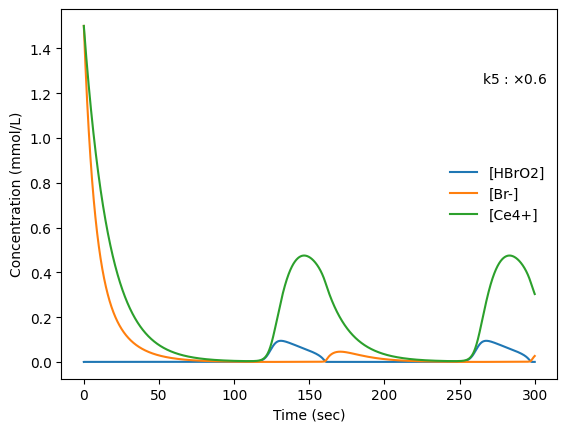

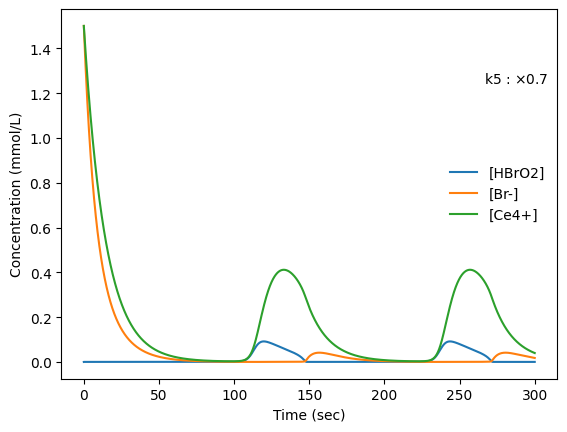

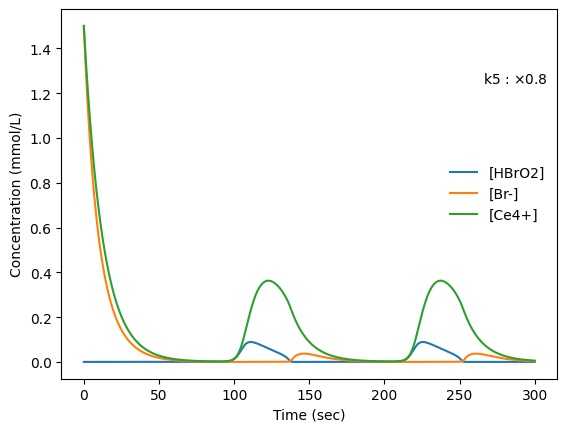

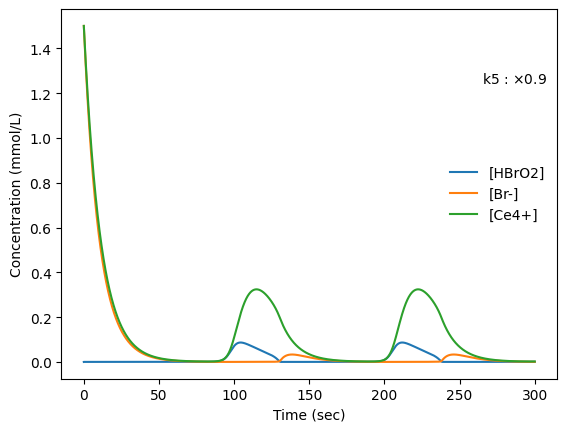

In [7]:
for i in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
  def rateequations(t,y):
      '''
      速度式（10）～（14）の右辺を計算する。

      入力パラメータ
      ----------
      t : スカラー (分単位の時間)
      y : 5つの濃度のNumPy 1D配列 [y_1, y_2, y_3, y_4, y_5]

      出力
      ---------
      dydt : 濃度の時間微分のNumPy 1D配列 [dy_1/dt, dy_2/dt, dy_3/dt, dy_4/dt, dy_5/dt]
      '''
      # 速度定数を定義する
      k_1      = 2 # 単位: M^-3min^-1
      k_2      = 1e6 # 単位: min^-1
      k_3      = 10 # 単位: min^-1
      k_4      = 2000     # 単位: M^-1 min^-1
      k_5      = 1*i # 単位: min^-1

      # 一定濃度の化学種
      BrO3 = 0.06
      H = 0.80
      CH2 = 0.10

      # 右辺を計算する（インデックスは0から始まるため、y_1 = y[0]、y_2 = y[1]などとなる）
      dy1dt = k_1*BrO3*H**2*y[1] - k_2*y[0]*y[1]*H + k_3*BrO3*y[0]*H - 2*k_4*y[0]**2
      dy2dt = -k_1*BrO3*y[1]*H**2 - k_2*y[0]*y[1]*H + 0.6*k_5*y[2]*CH2
      dy3dt = k_3*BrO3*y[0]*H - k_5*y[2]*CH2


      dydt=np.array([dy1dt, dy2dt, dy3dt])

      return dydt

  t0 = 0           # 初期時間
  tfinal = 300   # 最終時間 (分単位)
  t_span = [t0, tfinal]
  deltat = 0.0001     # 時間のステップサイズ (分単位)
  y0 = np.array([0, 0.0015, 0.0015]) # 初期濃度 (M単位)
  time, concentrations = RungeKutta4(rateequations, t_span, y0, deltat)
  substance_labels=['[HBrO2]', '[Br-]', '[Ce4+]']
  plt.text(
      0.98,  # x座標: グラフの右端に近い位置
      0.8,  # y座標: グラフの下端に近い位置
      f"k5 : $\\times {i}$",
      transform=plt.gca().transAxes,
      horizontalalignment='right'
  )

  # 濃度をプロットする。1000倍して濃度をmmol/L（mM）で表示する。
  for i in range(3):
      plt.plot(time, 1e3*concentrations[i,:],  label=substance_labels[i])
  plt.xlabel('Time (sec)')
  plt.ylabel('Concentration (mmol/L)')
  plt.legend(frameon=False);
  plt.show()